# Taller
### Aprendizaje Estadístico

**Nombre:** SAMUEL VASCO GONZÁLEZ

**CC:** 1152223665

In [1]:
!pip install fitter

     |████████████████████████████████| 47 kB 4.9 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=21727896cda5526d8de2b44d1d8c6f3d8ad3ccdeeac5753ae4b87c696b003bbd
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=7f604685d58ba5bcc7a2421a55dd86cc83036e7f7df61f6c0141716e6ed371de
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

# Regresión

[A Data-Driven Statistical Model for Predicting the Critical
Temperature of a Superconductor](https://arxiv.org/pdf/1803.10260.pdf)

En este estudio se crea un modelo estadístico para predecir la [temperatura crítica](https://es.wikipedia.org/wiki/Transici%C3%B3n_de_fase) $T_c$ de materiales superconductores. Este modelo se basa en la fórmula química de los materiales superconductores y de otras características extraídas de esta composición química.

En el dataset la primera columna es informativa y representa la composición del material, la segunda columna contiene la variable objetivo `critical_temp` que representa la temperatura crítica $T_c$ y las demás columnas son las características usadas para la predicción.

**Objetivo:** Predecir la temperatura crítica a partir de las características del dataset utilizando diferentes modelos de regresión lineal. 

**1)** Diseñe el mejor modelo posible utilizando las diferentes variaciones del modelo de regresión lineal.

**2)** Encuentre y describa las características con mayor capacidad predictiva en el conjunto de datos.


In [ ]:
!wget -O superconductor_data.zip https://www.dropbox.com/s/eg4m4jge6zbx23l/superconductor_data.zip?dl=0
superconductor_data = pd.read_csv("superconductor_data.zip", compression="zip", index_col=0)

--2021-10-04 05:45:34--  https://www.dropbox.com/s/eg4m4jge6zbx23l/superconductor_data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/eg4m4jge6zbx23l/superconductor_data.zip [following]
--2021-10-04 05:45:35--  https://www.dropbox.com/s/raw/eg4m4jge6zbx23l/superconductor_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb995314a83d0ce026143a1e11c.dl.dropboxusercontent.com/cd/0/inline/BXaP8DHVXUnoCHQN6uGWxQvuv7Deh0YTv73g-Yc63rhKBvwz7t4l0GJi-FV9FrhxYZmHisNI31FFnieulf4QQqhw23eBrb_r3ey6OjldO5KJFp4MIDwRqD5saEvTPm8pQqUqMcUnBT1VoVTakwsxzEzF/file# [following]
--2021-10-04 05:45:35--  https://ucb995314a83d0ce026143a1e11c.dl.dropboxusercontent.com/cd/0/inline/BXaP8DHVXUnoCHQN6uGWxQvuv7Deh0YTv73g-Yc63rhKBvwz7t4l

In [ ]:
superconductor_data

,material,critical_temp,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp.1
0,Ba0.2La1.8Cu1O4,29.00,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,...,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,Ba0.1La1.9Ag0.1Cu0.9O4,26.00,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,...,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,Ba0.1La1.9Cu1O4,19.00,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425000,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.250000,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,...,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.905500,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
4,Ba0.3La1.7Cu1O4,23.00,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,775.425000,1009.717143,718.152900,937.02557

Hay que eliminar la última columna, pues es repetida con la columna correspondiente a la Temperatura crítica.

In [ ]:
superconductor_data.drop(columns=['critical_temp.1'],inplace=True)

In [ ]:
superconductor_data

,material,critical_temp,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,...,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,Ba0.2La1.8Cu1O4,29.00,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,...,81.837500,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,Ba0.1La1.9Ag0.1Cu0.9O4,26.00,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,...,90.890000,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,Ba0.1La1.9Cu1O4,19.00,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425000,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.250000,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,...,81.837500,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.905500,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
4,Ba0.3La1.7Cu1O4,23.00,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,775.425000,1009.717143,71

# Exploración de Datos

### Dimensión del Dataset

Tenemos 19162 observaciones, 82 predictores y 1 variable objetivo; por lo tanto se cumple uno de los requisitos para emplear regresión lineal.

In [ ]:
superconductor_data.shape

(19162, 83)

### Naturaleza de los Datos

Para identificar que cada observación tenga el tipo adecuado en cada predictor, es decir, si el predictor es de tipo numérico o categórico debemos verificar que todas las observaciones tengan el tipo adecuado.

En este caso sólo la columna "**material**" es de tipo texto, el resto de columnas son de tipo numérico. 

In [ ]:
superconductor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19162 entries, 0 to 21262
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   material                         19162 non-null  object 
 1   critical_temp                    19162 non-null  float64
 2   number_of_elements               19162 non-null  int64  
 3   mean_atomic_mass                 19162 non-null  float64
 4   wtd_mean_atomic_mass             19162 non-null  float64
 5   gmean_atomic_mass                19162 non-null  float64
 6   wtd_gmean_atomic_mass            19162 non-null  float64
 7   entropy_atomic_mass              19162 non-null  float64
 8   wtd_entropy_atomic_mass          19162 non-null  float64
 9   range_atomic_mass                19162 non-null  float64
 10  wtd_range_atomic_mass            19162 non-null  float64
 11  std_atomic_mass                  19162 non-null  float64
 12  wtd_std_atomic_mas

### Valores ausentes

Ningún predictor tiene valores ausentes

In [ ]:
# Número de datos ausentes por variable
# ==============================================================================
val_nul=superconductor_data.isna().sum().sort_values()
v=list(val_nul)
print(val_nul)
print(f"El número total de valores ausentes en todo el dataset es: {sum(v)}")

material                  0
range_FusionHeat          0
wtd_entropy_FusionHeat    0
entropy_FusionHeat        0
wtd_gmean_FusionHeat      0
                         ..
wtd_mean_atomic_radius    0
mean_atomic_radius        0
wtd_std_fie               0
wtd_range_fie             0
wtd_std_Valence           0
Length: 83, dtype: int64
El número total de valores ausentes en todo el dataset es: 0


### Estudio de la Distribución de los Predictores y la Variable Objetivo

Estudiaremos ahora la distribución de los predictores.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7d7ceb390>,
      dtype=object)

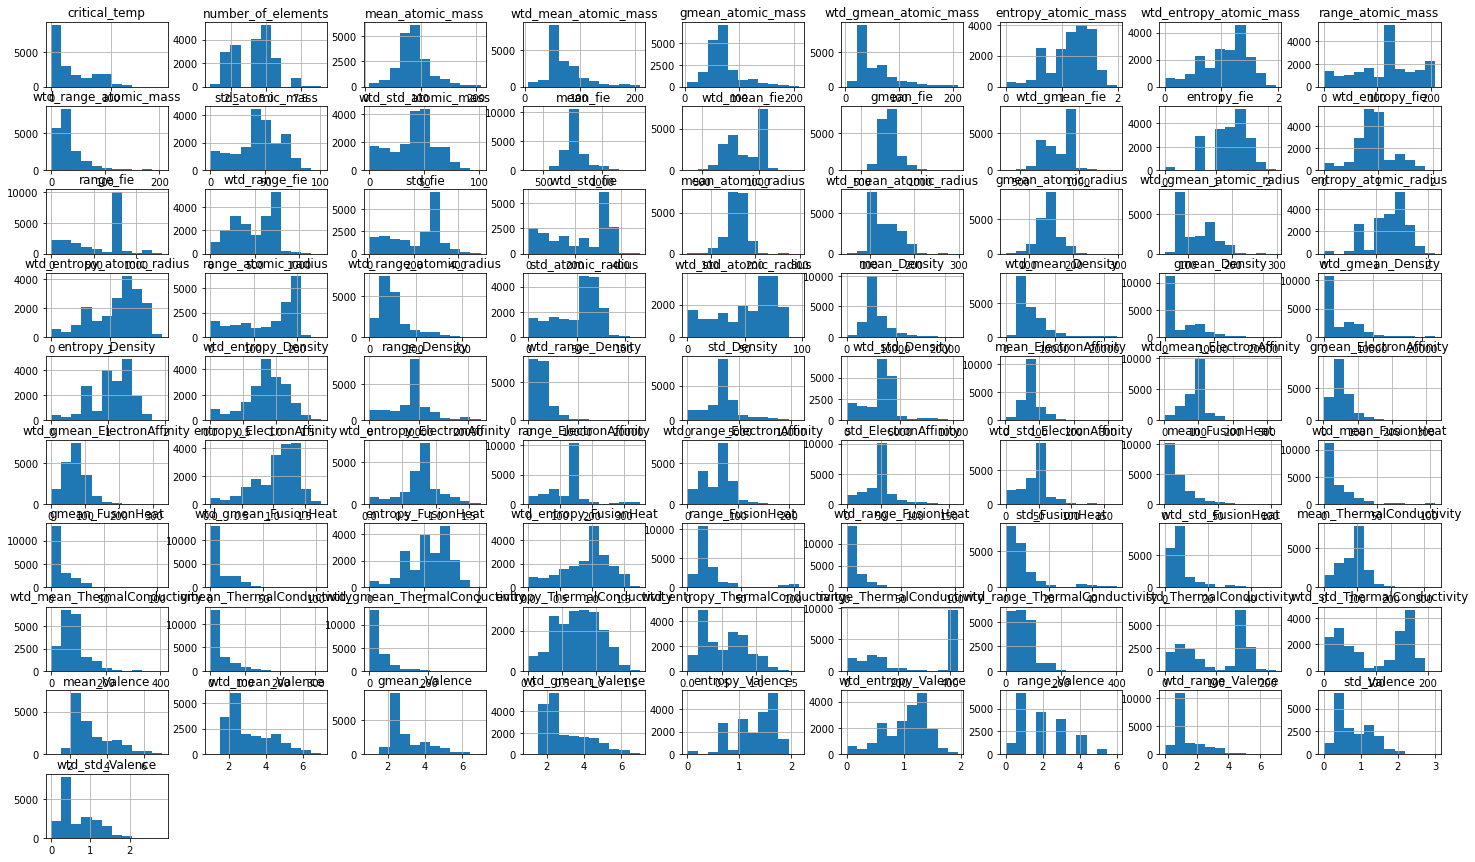

In [ ]:
superconductor_data.hist(figsize=(25,15),bins=11) 

Comportamiento de la distribución de la variable objetivo, temperatura crítica. Estudiaremos ahora cuál es la distribución de la temperatura crítica de los materiales superconductores observados, debido a que esta característica es la que nos interesa predecir y alrededor de la cuál se creará el modelo estadístico de regresión lineal.  

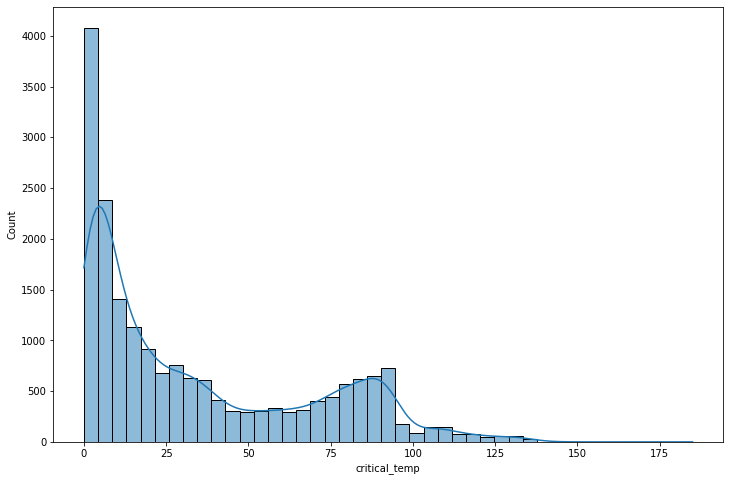

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=superconductor_data, x="critical_temp", kde=True)

Notamos dos picos en la distribución.

El primer pico se puede interpretar como que Alrededor de 6500 materiales superconductores observados tienen una temperatura crítica entre $0K$ y $12K$, esto indica que el 33% de los materiales presentan las temperaturas críticas más bajas y en un rango de temperaturas menor.  

El segundo pico al ser más ancho indica que la mayoría de materiales superconductores tienen temperaturas críticas más dispersas en un rango más amplio $[20,90]K$, se puede interpretar como que la mayoría de los materiales superconductores.

Para temperaturas críticas mayores a los $90K$ se encuentra una cantidad muy baja de materiales superconductores. Los cuales son los materiales más útiles para superconductividad y tiene sentido que sean los más escasos en la naturaleza, así como lo son en este experimento.

La resistencia de un superconductor desciende brúscamente a cero cuando el material se enfría por debajo de su temperatura crítica. Es decir, Una corriente eléctrica que fluye en una espiral de cable superconductor a temperatura por debajo de la temperatura crítica del superconductor puede persistir indefinidamente sin fuente de alimentación.

Para encontrar a qué distribución se aproxima más a la distribución de la variable objetivo. 

Usaremos la librería de python $fitter$, que permite identificar a qué distribución se ajustan mejor los datos. Esta librería permite ajustar cualquiera de las 80 distribuciones implementadas en $scipy$.

{'johnsonsb': {'a': 1.2975763414883617,
  'b': 0.5887731237089808,
  'loc': -0.15018774679492036,
  'scale': 185.3208134099317}}

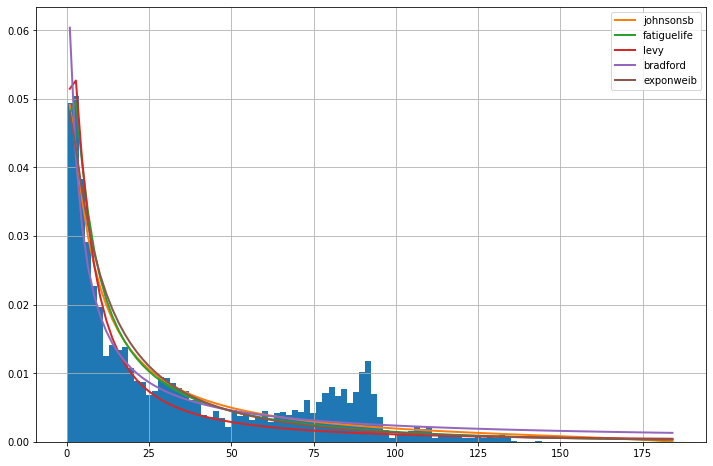

In [ ]:
plt.figure(figsize=(12,8))
f=Fitter(np.array(superconductor_data['critical_temp']), xmin=None, xmax=None, bins=100, distributions=None, timeout=10)
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

En la gráfica encontramos las 5 distribuciones que mejor se ajustan a los datos, y por medio del método $.get$_$best$ de la librería $fitter.Fitter$, el cual nos produce la mejor distribución que se ajusta a los datos.

**La distribución de Lévi** es de las que mejor se ajusta los datos de la variable objetivo "Temperatura crítica". es una distribución de probabilidad continua para una variable aleatoria no negativa. En espectroscopia, esta distribución, con la frecuencia como variable dependiente, se conoce como Perfil de Van Der Waals. Es un caso especial de distribución Gamma inversa. Es una distribución estable. (Tomado de [Lévy distribution](https://en.wikipedia.org/wiki/L%C3%A9vy_distribution)).

**La Distribución de Johnson** es la que mejor se ajusta los datos de la variable objetivo "Temperatura crítica". Esta distribución se ha utilizado con éxito para modelar la rentabilidad de los activos para la gestión de carteras. Las distribuciones de Johnson también se utilizan a veces en el precio de las opciones (precio o prima de las opciones de compra o venta), para adaptarse a una sonrisa de volatilidad observada. Árbol binomial de Johnson. (Tomado de [Johnson's SU-distribution](https://en.wikipedia.org/wiki/Johnson%27s_SU-distribution))

Esto nos puede servir como indicativo de que es necesario realizar una Normalización o Estandarización de los datos, pues usaremos específicamente un modelo de Regresión Lineal Regularizado, el cual exije que la variable objetivo tenga distribución de tipo normal y además que los datos estén normalizados.

Se usará la Normalización Z-score, esta divide cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.

### Correlación variables numéricas

Los modelos de Regresión Lineal se ven perjudicados por la incorporación de predictores altamente correlacionados. Por esta razón, es conveniente estudiar el grado de correlación entre las variables disponibles.

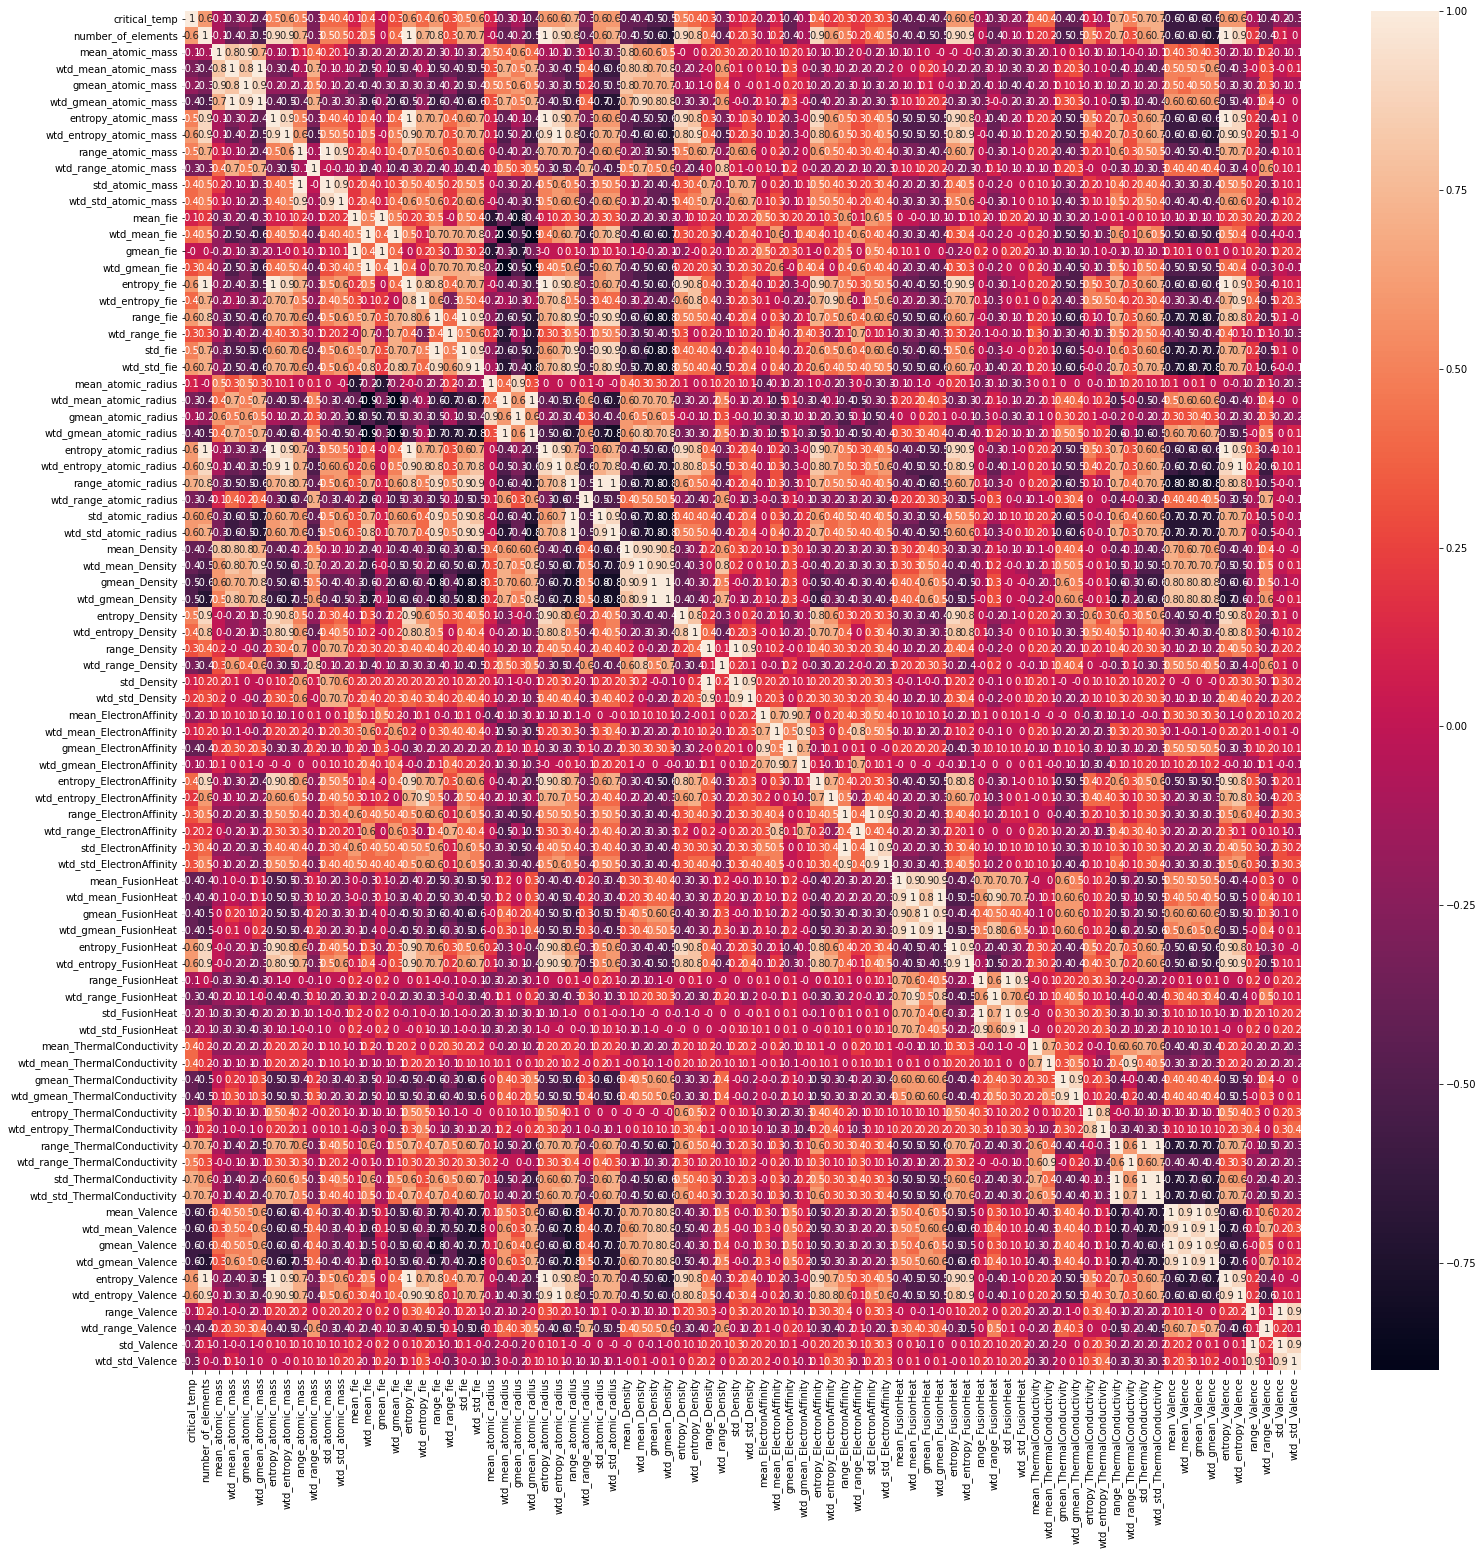

In [ ]:
plt.figure(figsize=(25,25))
correlation_matrix = superconductor_data.corr().round(1)
sns.heatmap(correlation_matrix, annot=True)

Encontrams que los predictores cerca a la diagonal y en especial los del mismo tipo, por ejemplo, range_ThermalConductivity, wtd_range_ThermalConductivity, std_ThermalConductivity y wtd_std_ThermalConductivity, estos predictores están altamente correlacionados con valores de correlación de $0.9$ y $1$.

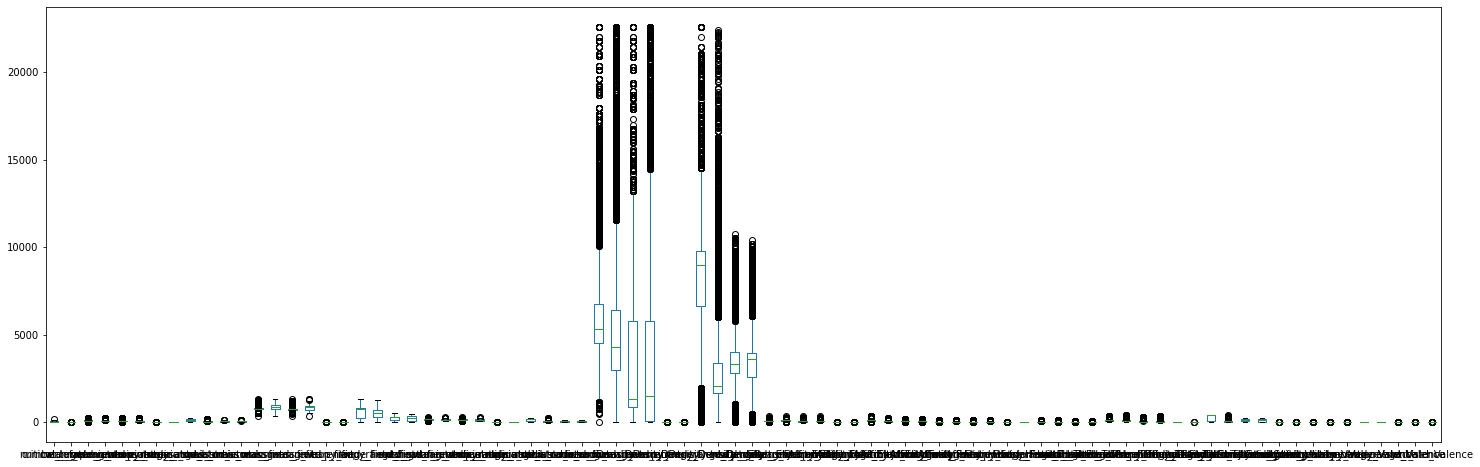

In [ ]:
superconductor_data.plot(kind='box', figsize=(25,8))

Por medio del diagrama de cajas podemos visualizar la presencia de outliers, pero esto se tratará usando Normalización Z-score porque a simple vista podemos estar engañados.

### Normalización Z-score

In [ ]:
superconductor_data.set_index('material',inplace=True)

In [ ]:
superconductor_data

,critical_temp,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,...,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ba0.2La1.8Cu1O4,29.00,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,...,81.837500,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
Ba0.1La1.9Ag0.1Cu0.9O4,26.00,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,...,90.890000,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
Ba0.1La1.9Cu1O4,19.00,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425000,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.250000,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,...,81.837500,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.905500,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
Ba0.3La1.7Cu1O4,23.0

In [ ]:
std_dev = 3
new_superconductor_data=stats.zscore(superconductor_data)
outliers = (np.abs(new_superconductor_data) < std_dev).any(axis=1)
superconductor_data_limpio=superconductor_data[outliers]
print("Dimensión del Dataset luego de aplicar regla de las 3 dimensiones estándar ",superconductor_data_limpio.shape)
new_superconductor_data=pd.DataFrame(new_superconductor_data, index=superconductor_data.index, columns=superconductor_data.columns)
new_superconductor_data

Dimensión del Dataset luego de aplicar regla de las 3 dimensiones estándar  (19162, 82)


,critical_temp,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,...,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ba0.2La1.8Cu1O4,-0.157283,-0.079672,0.046559,-0.450852,-0.159046,-0.610858,0.045127,-0.002712,0.134049,-0.053556,0.378185,0.608264,0.066993,0.972877,-0.245747,0.875333,0.018853,-0.401852,0.768590,1.123118,0.981617,1.026592,0.111431,-1.011271,-0.376847,-1.014953,-0.021456,0.186548,0.974791,-0.239633,1.030173,0.667044,-0.510889,-0.714078,-0.737623,-0.769703,-0.112966,-0.127160,0.073516,-0.548387,...,0.178843,0.587278,0.199599,0.851834,0.261182,0.060568,0.106768,0.752708,0.115023,-0.090052,-0.651946,-0.696989,-0.660009,-0.690587,-0.012028,0.218638,-0.405067,-0.563884,-0.428230,-0.416925,0.469312,-0.450994,-0.668705,-0.664647,-1.286588,-0.871304,0.938978,-0.113678,1.162152,0.663905,-0.908157,-0.751245,-0.805801,-0.710613,0.187159,0.035692,-0.837915,-0.404049,-0.838756,-0.520613
Ba0.1La1.9Ag0.1Cu0.9O4,-0.244920,0.613954,0.174002,-0.431323,0.059112,-0.603234,0.776130,-0.014258,0.134049,0.107409,0.135190,0.626127,-0.035673,0.975277,-0.214425,0.881407,0.640975,-0.355287,0.768590,1.155120,0.676345,1.021911,0.158577,-1.030084,-0.135359,-1.019362,0.640366,0.179376,0.974791,-0.021226,0.685256,0.618636,-0.101362,-0.695637,-0.599450,-0.769564,0.706190,0.185305,0.445976,-0.511955,...,0.506231,0.605553,0.534762,0.907213,1.041100,0.239564,0.106768,0.760409,0.023429,-0.133559,-0.574489,-0.700465,-0.568409,-0.691021,0.747521,0.428998,-0.405067,-0.576777,-0.442671,-0.425650,2.144141,-0.443152,-0.404749,-0.664703,0.367976,0.087762,1.127839,-0.246168,1.655588,0.681371,-1.147972,-0.751245,-1.117165,-0.718373,0.664850,-0.014147,-0.033419,-0.360345,-0.427506,-0.451238
Ba0.1La1.9Cu1O4,-0.449407,-0.079672,0.046559,-0.450181,-0.159046,-0.610697,0.045127,-0.217728,0.134049,0.091897,0.378185,0.609951,0.066993,0.976721,-0.245747,0.883604,0.018853,-0.455219,0.768590,1.155120,0.981617,1.020667,0.111431,-1.039985,-0.376847,-1.023697,-0.021456,0.003895,0.974791,-0.057084,1.030173,0.610306,-0.510889,-0.702410,-0.737623,-0.769595,-0.112966,-0.296462,0.073516,-0.511955,...,0.178843,0.602363,0.199599,0.904549,0.261182,0.055769,0.106768,0.760409,0.115023,-0.134914,-0.651946,-0.698678,-0.660009,-0.690856,-0.012028,0.036767,-0.405067,-0.562795,-0.428230,-0.419284,0.469312,-0.452563,-0.668705,-0.664719,-1.286588,-0.910222,0.938978,-0.113678,1.162152,0.664273,-0.908157,-0.739233,-0.805801,-0.699622,0.187159,-0.061486,-0.837915,-0.374913,-

Luego de aplicar Normalización Z-score a 3 desviaciones estándar el Dataset quedó de igual dimensión que al inicio, incluso aplicamos la regla a 2 y 1 desviación estándar y permaneció constante la dimensión del Dataset. Esto quiere decir que los datos no están alejados más allá de 1 desviación estándar de la media.

Además aprovechamos la Normalización Z-score para transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala.

Dado que los métodos de regularización actúan sobre la magnitud de los coeficientes del modelo, todos deben de estár en la misma escala, por esta razón es necesario estandarizar o normalizar los predictores antes de entrenar el modelo.

### División del dataset en Train y Test

In [ ]:
#DATOS ESTANDARIZADOS

# División de los datos en train y test
# ==============================================================================
X = new_superconductor_data.drop(columns=['critical_temp'])
y = new_superconductor_data['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                  random_state=43,shuffle=True)

#DATOS SIN ESTANDARIZAR

# División de los datos en train y test
# ==============================================================================
X1 = superconductor_data.drop(columns=['critical_temp'])
y1 = superconductor_data['critical_temp']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.3,
                                                  random_state=0,shuffle=True)

## Modelo de Regresión Lineal normal 

La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Tres de las limitaciones que aparecen en la práctica al tratar de emplear este tipo de modelos son:

*   Se ven perjudicados por la incorporación de predictores correlacionados.
*   No realizan selección de predictores, todos los predictores se incorporan en el modelo aunque no aporten información relevante. Esto suele complicar la interpretación del modelo y reducir su capacidad predictiva.

*   No pueden ajustarse cuando el número de predictores es superior al número de observaciones.










In [ ]:
#DATOS SIN ESTANDARIZAR

#Modelo
#==============================================================================
linear_regression = LinearRegression()

#Entrenamiento del modelo
# ==============================================================================
linear_regression.fit(X_train1,y_train1)

# Predicciones test
# ==============================================================================
predicciones = linear_regression.predict(X=X_test1)
predicciones = predicciones.flatten()

#Error R2
# ==============================================================================
print("El R2 para el set de Entrenamiento es: ",linear_regression.score(X_train1,y_train1))
print("El R2 para el set de Test es: ",linear_regression.score(X_test1,y_test1))

# Error cuadrático medio 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test1,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (RMSE) de test es: {rmse_ols}")

El R2 para el set de Entrenamiento es:  0.7351964465282252
El R2 para el set de Test es:  0.738129411739683

El error (RMSE) de test es: 17.606906330788522


El RMSE son las unidades promedio que se alejan las predicciones del valor reales.

Las predicciones del modelo final se alejan en promedio $17.61$ unidades del valor real para la temperatura crítica de materiales superconductores. Se obtuvo $R^2=0.738$ y RMSE$=17.607$

In [ ]:
#DATOS ESTANDARIZADOS

#Modelo
#==============================================================================
linear_regression = LinearRegression()

#Entrenamiento del modelo
# ==============================================================================
linear_regression.fit(X_train,y_train)

# Predicciones test
# ==============================================================================
predicciones = linear_regression.predict(X=X_test)
predicciones = predicciones.flatten()

#Error R2
# ==============================================================================
print("El R2 para el set de Entrenamiento es: ",linear_regression.score(X_train,y_train))
R2_LinearRegression=linear_regression.score(X_test,y_test)
print("El R2 para el set de Test es: ",R2_LinearRegression)

# Error cuadrático medio 
# ==============================================================================
rmse_LinearRegression = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (RMSE) de test es: {rmse_LinearRegression}")

El R2 para el set de Entrenamiento es:  0.7379368899852083
El R2 para el set de Test es:  0.7316127743906075

El error (RMSE) de test es: 0.5142136043711787


Obtenemos resultados de rendimiento similares respecto a $R^2$, pero lo que marca la diferencia es que el RMSE del modelo de regresión lineal con los datos Estandarizados es mucho mejor. 

Las predicciones del modelo final se alejan en promedio $0.51$ unidades del valor real para la temperatura crítica de materiales superconductores.
Se obtuvo $R^2=0.732$ y RMSE$=0.514$

### Ridge

$$ Ridge= \sum_{i=1}^n(y_i−β_0−\sum_{j=1}^pβ_jx_{ij})^2+λ\sum_{j=1}^pβ_j^2 $$

La regularización Ridge penaliza la suma de los coeficientes elevados al cuadrado  ($\sum_{j=1}^pβ_j^2$) . A esta penalización se le conoce como $l_2$ y tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero. El grado de penalización está controlado por el hiperparámetro  $λ$. Cuando $λ=0$ , la penalización es nula y el resultado es equivalente al de un modelo lineal por mínimos cuadrados ordinarios (OLS). A medida que $λ$ aumenta, mayor es la penalización y menor el valor de los predictores.

La principal ventaja de aplicar ridge frente al ajuste por mínimos cuadrados ordinarios (OLS) es la reducción de varianza. Por lo general, en situaciones en las que la relación entre la variable respuesta y los predictores es aproximadamente lineal, las estimaciones por mínimos cuadrados tienen poco bias pero aún pueden sufrir alta varianza (pequeños cambios en los datos de entrenamiento tienen mucho impacto en el modelo resultante). Este problema se acentúa conforme el número de predictores introducido en el modelo se aproxima al número de observaciones de entrenamiento, llegando al punto en que, si $p>n$, no es posible ajustar el modelo por mínimos cuadrados ordinarios. Empleando un valor adecuado de $λ$, el método de ridge es capaz de reducir varianza sin apenas aumentar el bias, consiguiendo así un menor error total.

La desventaja del método ridge es que, el modelo final, incluye todos los predictores. Esto es así porque, si bien la penalización fuerza a que los coeficientes tiendan a cero, nunca llegan a ser exactamente cero (solo si  $λ=∞$ ). Este método consigue minimizar la influencia sobre el modelo de los predictores menos relacionados con la variable respuesta pero, en el modelo final, van a seguir apareciendo. Aunque esto no supone un problema para la precisión del modelo, sí lo es para su interpretación.

In [ ]:
#DATOS SIN ESTANDARIZAR

#Modelo
#==============================================================================
ridge_regressionCV=RidgeCV(np.logspace(-10, 2, 200)) 

#Entrenamiento del modelo
# ==============================================================================
ridge_regressionCV.fit(X_train1,y_train1)

# Predicciones test
# ==============================================================================
predicciones = ridge_regressionCV.predict(X=X_test1)
predicciones = predicciones.flatten()

# Mejor valor alpha encontrado
# ==============================================================================
print("")
print(f"Mejor valor de alpha encontrado: {ridge_regressionCV.alpha_}")

#Error R2
# ==============================================================================
print("El R2 para el set de Entrenamiento es: ",ridge_regressionCV.score(X_train1,y_train1))
print("El R2 para el set de Test es: ",ridge_regressionCV.score(X_test1,y_test1))

# Error cuadrático medio 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test1,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (RMSE) de test es: {rmse_ols}")


Mejor valor de alpha encontrado: 0.01825183494319039
El R2 para el set de Entrenamiento es:  0.7351894128442936
El R2 para el set de Test es:  0.7381565327721034

El error (RMSE) de test es: 17.60599456394036


La diferencia con la Regresión normal (sin estadarizar) es mínima pero mejor. se presentan mejorías apenas notorias en la quinta cifra significativa para el $R^2$ de Test y en la tercera cifra significativa para el RMSE. Se obtuvo $R^2=0.738$ y RMSE$=17.606$

In [ ]:
#DATOS ESTANDARIZADOS

#Modelo
#==============================================================================
ridge_regressionCV=RidgeCV(np.logspace(-10, 2, 200))

#Entrenamiento del modelo
# ==============================================================================
ridge_regressionCV.fit(X_train,y_train)

# Predicciones test
# ==============================================================================
predicciones = ridge_regressionCV.predict(X=X_test)
predicciones = predicciones.flatten()

# Mejor valor alpha encontrado
# ==============================================================================
print("")
print(f"Mejor valor de alpha encontrado: {ridge_regressionCV.alpha_}")

#Error R2
# ==============================================================================
print("El R2 para el set de Entrenamiento es: ",ridge_regressionCV.score(X_train,y_train))
R2_Ridge=ridge_regressionCV.score(X_test,y_test)
print("El R2 para el set de Test es: ",R2_Ridge)

# Error cuadrático medio 
# ==============================================================================
rmse_Ridge = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (RMSE) de test es: {rmse_Ridge}")


Mejor valor de alpha encontrado: 0.06368249944718586
El R2 para el set de Entrenamiento es:  0.7379305342086118
El R2 para el set de Test es:  0.7316156958028996

El error (RMSE) de test es: 0.5142108057394085


La diferencia con la Regresión normal (estadarizada) es mínima pero mejor. se presentan mejorías apenas notorias en la sexta cifra significativa para el $R^2$ de Test y para el RMSE. Se obtuvo $R^2=0.732$ y RMSE$=0.514$

### Lasso

$$ Lasso= \sum_{i=1}^n(y_i−β_0−\sum_{j=1}^pβ_jx_{ij})^2+λ\sum_{j=1}^p|β_j| $$

La regularización Lasso penaliza la suma del valor absolutos de los coeficientes de regresión ($\sum_{j=1}^p|β_j|$). A esta penalización se le conoce como $l_1$ y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero. Dado que un predictor con coeficiente de regresión cero no influye en el modelo, Lasso consigue excluir los predictores menos relevantes. Al igual que en ridge, el grado de penalización está controlado por el hiperparámetro $λ$. Cuando $λ=0$, el resultado es equivalente al de un modelo lineal por mínimos cuadrados ordinarios. A medida que $λ$ aumenta, mayor es la penalización y más predictores quedan excluidos.

In [ ]:
#DATOS SIN ESTANDARIZAR

#Modelo
#==============================================================================
lasso_regressionCV=LassoCV(n_alphas=100)

#Entrenamiento del modelo
# ==============================================================================
lasso_regressionCV.fit(X_train1,y_train1)

# Predicciones test
# ==============================================================================
predicciones = lasso_regressionCV.predict(X=X_test1)
predicciones = predicciones.flatten()

# Mejor valor alpha encontrado
# ==============================================================================
print("")
print(f"Mejor valor de alpha encontrado: {lasso_regressionCV.alpha_}")

#Error R2
# ==============================================================================
print("El R2 para el set de Entrenamiento es: ",lasso_regressionCV.score(X_train1,y_train1))
print("El R2 para el set de Test es: ",lasso_regressionCV.score(X_test1,y_test1))

# Error cuadrático medio 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test1,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (RMSE) de test es: {rmse_ols}")
print("")

# Predictores más relevantes
# ==============================================================================
lasso_regression = Lasso(alpha=lasso_regressionCV.alpha_)
lasso_regression.fit(X_train1, y_train1)
print("Los predictores más relevantes son: ")
print("")
cont=0
predictor_selected1=[]
for i in np.nonzero(lasso_regression.coef_)[0]:
  cont+=1
  predictor_selected1.append(X1.columns[i])
  print("      ",X1.columns[i])
print("")
print(f"Se encontraron {cont} predictores relevantes de {X1.shape[1]} en total")


Mejor valor de alpha encontrado: 72.54373400315917
El R2 para el set de Entrenamiento es:  0.5949240066640997
El R2 para el set de Test es:  0.598906920241058

El error (RMSE) de test es: 21.79025318193608

Los predictores más relevantes son: 

       range_atomic_mass
       range_fie
       range_atomic_radius
       wtd_mean_Density
       gmean_Density
       wtd_gmean_Density
       range_Density
       wtd_range_Density
       std_Density
       wtd_std_Density
       gmean_ElectronAffinity
       wtd_gmean_ElectronAffinity
       wtd_mean_ThermalConductivity
       wtd_std_ThermalConductivity

Se encontraron 14 predictores relevantes de 81 en total


Los resultados obtenidos con este modelo son muy pobres en comparación con Ridge. Pues se obtuvo $R^2= 0.59$ y RMSE$=21.79$. Lo interesante es que se pudo seleccionar 14 predictores que resultaron relevantes para el modelo.

In [ ]:
#DATOS ESTANDARIZADOS

#Modelo
#==============================================================================
lasso_regressionCV=LassoCV(n_alphas=100)

#Entrenamiento del modelo
# ==============================================================================
lasso_regressionCV.fit(X_train,y_train)

# Predicciones test
# ==============================================================================
predicciones = lasso_regressionCV.predict(X=X_test)
predicciones = predicciones.flatten()

# Mejor valor alpha encontrado
# ==============================================================================
print("")
print(f"Mejor valor de alpha encontrado: {lasso_regressionCV.alpha_}")

#Error R2
# ==============================================================================
print("El R2 para el set de Entrenamiento es: ",lasso_regressionCV.score(X_train,y_train))
R2_Lasso=lasso_regressionCV.score(X_test,y_test)
print("El R2 para el set de Test es: ",R2_Lasso)

# Error cuadrático medio 
# ==============================================================================
rmse_Lasso = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (RMSE) de test es: {rmse_Lasso}")
print("")

# Predictores más relevantes
# ==============================================================================
lasso_regression = Lasso(alpha=lasso_regressionCV.alpha_)
lasso_regression.fit(X_train, y_train)
print("Los predictores más relevantes son: ")
print("")
cont=0
predictor_selected=[]
for i in np.nonzero(lasso_regression.coef_)[0]:
  cont+=1
  predictor_selected.append(X.columns[i])
  print("      ",X.columns[i])
print("")
print(f"Se encontraron {cont} predictores relevantes de {X.shape[1]} en total")
print("")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0895021057640406, tolerance: 1.0769387265652883
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.088301823331676, tolerance: 1.0769387265652883
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.964056933746178, tolerance: 1.0769387265652883
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to in


Mejor valor de alpha encontrado: 0.0007248586919745277
El R2 para el set de Entrenamiento es:  0.7298756407946224
El R2 para el set de Test es:  0.7259712565304869

El error (RMSE) de test es: 0.519589901353175

Los predictores más relevantes son: 

       number_of_elements
       mean_atomic_mass
       wtd_mean_atomic_mass
       entropy_atomic_mass
       wtd_entropy_atomic_mass
       range_atomic_mass
       wtd_range_atomic_mass
       std_atomic_mass
       wtd_std_atomic_mass
       wtd_mean_fie
       gmean_fie
       wtd_gmean_fie
       entropy_fie
       wtd_entropy_fie
       range_fie
       wtd_range_fie
       std_fie
       wtd_std_fie
       mean_atomic_radius
       wtd_mean_atomic_radius
       gmean_atomic_radius
       wtd_gmean_atomic_radius
       wtd_entropy_atomic_radius
       range_atomic_radius
       wtd_range_atomic_radius
       std_atomic_radius
       wtd_std_atomic_radius
       mean_Density
       wtd_mean_Density
       wtd_gmean_Density
       en

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286.9478705846359, tolerance: 1.3497589556356135
  positive)


Se obtuvieron buenos resultados, pues $R^2=0.726$ y RMSE$=0.519$ son bastante cercanos a los obtenidos en Ridge, con la diferencia de que se pudieron seleccionar 68 predictores relevantes de los 82 en total.




### Elastic Net

$$ Elastic Net = \dfrac{\sum_{i=1}^n(y_i−β_0−\sum_{j=1}^pβ_jx_{ij})^2}{2n}+αλ\sum_{j=1}^p|β_j| + \dfrac{1-α}{2}\sum_{j=1}^pβ_j^2$$

Elastic net incluye una regularización que combina la penalización $l_1$ y $l_2$. El grado en que influye cada una de las penalizaciones está controlado por el hiperparámetro $α$. Su valor está comprendido en el intervalo $[0,1]$. Cuando $α=0$, se aplica Ridge y cuando $α=1$ se aplica Lasso. La combinación de ambas penalizaciones suele dar lugar a buenos resultados. Una estrategia frecuentemente utilizada es asignarle casi todo el peso a la penalización $l_1$ ($α$ muy próximo a $1$) para conseguir seleccionar predictores y un poco a la $l_2$ para dar cierta estabilidad en el caso de que algunos predictores estén correlacionados.

In [ ]:
#DATOS ESTANDARIZADOS

#Modelo
#==============================================================================
elasticnet_regressionCV=ElasticNetCV(l1_ratio=[0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],n_alphas=100)

#Entrenamiento del modelo
# ==============================================================================
elasticnet_regressionCV.fit(X_train,y_train)

# Predicciones test
# ==============================================================================
predicciones = elasticnet_regressionCV.predict(X=X_test)
predicciones = predicciones.flatten()

# Mejor valor alpha encontrado
# ==============================================================================
print("")
print(f"Mejor valor de alpha encontrado: {elasticnet_regressionCV.alpha_}")

# Mejor valor l1_ratio encontrado
# ==============================================================================
print("")
print(f"Mejor valor de l1_ratio encontrado: {elasticnet_regressionCV.l1_ratio_}")

#Error R2
# ==============================================================================
print("El R2 para el set de Entrenamiento es: ",elasticnet_regressionCV.score(X_train,y_train))
R2_ElasticNet=elasticnet_regressionCV.score(X_test,y_test)
print("El R2 para el set de Test es: ",R2_ElasticNet)

# Error cuadrático medio 
# ==============================================================================
rmse_ElasticNet = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (RMSE) de test es: {rmse_ElasticNet}")
print("")

# Predictores más relevantes
# ==============================================================================
print("Los predictores más relevantes son: ")
print("")
cont=0
predictor_selected_ElasticNet=[]
for i in np.nonzero(elasticnet_regressionCV.coef_)[0]:
  cont+=1
  predictor_selected.append(X.columns[i])
  print("      ",X.columns[i])
print("")
print(f"Se encontraron {cont} predictores relevantes de {X.shape[1]} en total")
print("")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.235949998103024, tolerance: 1.0769387265652883
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1083340056934503, tolerance: 1.084106871437866
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3591834135277168, tolerance: 1.084106871437866
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to inc


Mejor valor de alpha encontrado: 0.0007321804969439678

Mejor valor de l1_ratio encontrado: 0.99
El R2 para el set de Entrenamiento es:  0.7298571682216505
El R2 para el set de Test es:  0.7259629954456264

El error (RMSE) de test es: 0.5195977332759572

Los predictores más relevantes son: 

       number_of_elements
       mean_atomic_mass
       wtd_mean_atomic_mass
       entropy_atomic_mass
       wtd_entropy_atomic_mass
       range_atomic_mass
       wtd_range_atomic_mass
       std_atomic_mass
       wtd_std_atomic_mass
       wtd_mean_fie
       gmean_fie
       wtd_gmean_fie
       entropy_fie
       wtd_entropy_fie
       range_fie
       wtd_range_fie
       std_fie
       wtd_std_fie
       mean_atomic_radius
       wtd_mean_atomic_radius
       gmean_atomic_radius
       wtd_gmean_atomic_radius
       wtd_entropy_atomic_radius
       range_atomic_radius
       wtd_range_atomic_radius
       std_atomic_radius
       wtd_std_atomic_radius
       mean_Density
       wtd_mean

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286.7085305374226, tolerance: 1.3497589556356135
  positive)


Obtenemos los mismos predictores seleccionados por Lasso con estandarización y una ligera desmejora respecto a Lasso. Se obtuvo $R^2=0.726$ y RMSE$=0.519$

### Nuevo Modelo Propuesto

Se propone un modelo con y sin estadarización usando la regresión de Ridge pero con los predictores seleccionados por Lasso respectivamente. 

In [ ]:
#DATOS ESTANDARIZADOS

# División de los datos en train y test
# ==============================================================================
X_new_model = X[predictor_selected]

X_train_new_model, X_test_new_model, y_train_new_model, y_test_new_model = train_test_split(X_new_model,y,test_size=0.3,
                                                  random_state=43,shuffle=True)

#DATOS SIN ESTANDARIZAR

# División de los datos en train y test
# ==============================================================================
X1_new_model = X1[predictor_selected1]

X_train1_new_model, X_test1_new_model, y_train1_new_model, y_test1_new_model = train_test_split(X1_new_model,y1,test_size=0.3,
                                                  random_state=0,shuffle=True)

### Implementemos Ridge para estos nuevos Datasets con los predictores seleccionados por Lasso anteriormente.

In [ ]:
#DATOS SIN ESTANDARIZAR

#Modelo
#==============================================================================
ridge_regressionCV_new_model=RidgeCV(np.linspace(1e-5,100000)) 

#Entrenamiento del modelo
# ==============================================================================
ridge_regressionCV_new_model.fit(X_train1_new_model,y_train1_new_model)

# Predicciones test
# ==============================================================================
predicciones = ridge_regressionCV_new_model.predict(X=X_test1_new_model)
predicciones = predicciones.flatten()

# Mejor valor alpha encontrado
# ==============================================================================
print("")
print(f"Mejor valor de alpha encontrado: {ridge_regressionCV_new_model.alpha_}")

#Error R2
# ==============================================================================
print("El R2 para el set de Entrenamiento es: ",ridge_regressionCV_new_model.score(X_train1_new_model,y_train1_new_model))
print("El R2 para el set de Test es: ",ridge_regressionCV_new_model.score(X_test1_new_model,y_test1_new_model))

# Error cuadrático medio 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test1_new_model,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (RMSE) de test es: {rmse_ols}")


Mejor valor de alpha encontrado: 36734.69388387755
El R2 para el set de Entrenamiento es:  0.609864553752225
El R2 para el set de Test es:  0.6119959238544075

El error (RMSE) de test es: 21.431759933808344


No se obtienen buenos resultados en las métricas de este nuevo modelo propuesto sin estandarización en comparación con el de Ridge. Sin embargo, esta implementación mejora los resultados obtenidos por Lasso sin estandarización: 

$R^2= 0.59$ y RMSE$=21.79$ de Lasso sin estandarización contra $R^2= 0.612$ y RMSE$=21.43$ del nuevo modelo propuesto.

In [ ]:
#DATOS ESTANDARIZADOS

#Modelo
#==============================================================================
ridge_regressionCV_new_model=RidgeCV(np.logspace(-10, 2, 200)) 

#Entrenamiento del modelo
# ==============================================================================
ridge_regressionCV_new_model.fit(X_train_new_model,y_train_new_model)

# Predicciones test
# ==============================================================================
predicciones = ridge_regressionCV_new_model.predict(X=X_test_new_model)
predicciones = predicciones.flatten()

# Mejor valor alpha encontrado
# ==============================================================================
print("")
print(f"Mejor valor de alpha encontrado: {ridge_regressionCV_new_model.alpha_}")

#Error R2
# ==============================================================================
print("El R2 para el set de Entrenamiento es: ",ridge_regressionCV_new_model.score(X_train_new_model,y_train_new_model))
R2_new_model=ridge_regressionCV_new_model.score(X_test_new_model,y_test_new_model)
print("El R2 para el set de Test es: ",R2_new_model)

# Error cuadrático medio 
# ==============================================================================
rmse_new_model = mean_squared_error(
            y_true  = y_test_new_model,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (RMSE) de test es: {rmse_new_model}")


Mejor valor de alpha encontrado: 0.19338917504552322
El R2 para el set de Entrenamiento es:  0.7358016594694982
El R2 para el set de Test es:  0.7290455954326345

El error (RMSE) de test es: 0.516667030842046


Se obtienen resultados cercanos en las métricas de este nuevo modelo propuesto con estandarización en comparación con las de Ridge. 

Sin embargo se logra mejorar los resultados obtenidos por Lasso con estandarización y Elastic Net con estandarización:

$R^2=0.726$ y RMSE$=0.519$ de Lasso con estandarización y $R^2=0.726$ y RMSE$=0.519$ de Elastic Net con estandarización contra $R^2= 0.729$ y RMSE$=0.516$ del nuevo modelo propuesto con estandarización.

**Por lo anterior podemos afirmar que los 68 predictores o características seleccionadas por Lasso y Elastic Net tienen el mayor poder predictivo sobre el conjunto de datos de materiales superconductores. Las características son:**

In [ ]:
for i in range(int(len(predictor_selected)/2)):
  print("    ",predictor_selected[i]," "*(30-len(predictor_selected[i])),predictor_selected[i+1])

     number_of_elements              mean_atomic_mass
     mean_atomic_mass                wtd_mean_atomic_mass
     wtd_mean_atomic_mass            entropy_atomic_mass
     entropy_atomic_mass             wtd_entropy_atomic_mass
     wtd_entropy_atomic_mass         range_atomic_mass
     range_atomic_mass               wtd_range_atomic_mass
     wtd_range_atomic_mass           std_atomic_mass
     std_atomic_mass                 wtd_std_atomic_mass
     wtd_std_atomic_mass             wtd_mean_fie
     wtd_mean_fie                    gmean_fie
     gmean_fie                       wtd_gmean_fie
     wtd_gmean_fie                   entropy_fie
     entropy_fie                     wtd_entropy_fie
     wtd_entropy_fie                 range_fie
     range_fie                       wtd_range_fie
     wtd_range_fie                   std_fie
     std_fie                         wtd_std_fie
     wtd_std_fie                     mean_atomic_radius
     mean_atomic_radius              wtd_mean_at

### Comparación de modelos

In [ ]:
df_comparacion = pd.DataFrame({
                    'Modelo': ['Regresión Lineal', 'Ridge', 'Lasso','Elastic Net', 'Nuevo Modelo Lasso-Ridge'],
                    'Test R2': [R2_LinearRegression,R2_Ridge,R2_Lasso,R2_ElasticNet,R2_new_model],
                    'Test RMSE': [rmse_LinearRegression, rmse_Ridge, rmse_Lasso, rmse_ElasticNet,rmse_new_model]
                 })

df_comparacion

,Modelo,Test R2,Test RMSE
0,Regresión Lineal,0.731613,0.514214
1,Ridge,0.731616,0.514211
2,Lasso,0.725971,0.519590
3,Elastic Net,0.725963,0.519598
4,Nuevo Modelo Lasso-Ridge,0.729046,0.516667


**Comparando las métricas para cada modelo, el mejor modelo es la Regresión Ridge con estandarización y usando todos los predictores. Cuenta con el mayor $R^2=0.731616$ y el menor RMSE$=0.514211$, ganando por una diferencia extremadamente pequeña frente a la regresión lineal sin regularización.** 

Cabe recalcar que el modelo que se propuso no se quedó atrás frente al resto, al contrario produjo mejores resultados que Lasso y Elastic Net. Además todos presentan rendimientos que difieren por muy poco.

# Clasificación

[Searching for exotic particles in high-energy physics with deep learning](https://www.nature.com/articles/ncomms5308.pdf)

Las colisiones de alta energía en aceleradores de partículas son fuente para la búsqueda y descubrimiento de nuevas partículas exóticas. Sin embargo, encontrar estar partículas exóticas requiere resolver el difícil problema de discriminar la señal en contra del ruido. 

Este problema en específico busca distinguir procesos en colisionadores de hadrónes en los cuales se producen partículas supersiméticas (SUSY) en contra de procesos en los cuales estas partículas no son producidas.

Este dataset contiene en la primera columna la clase objetivo (1 para procesos SUSY y 0 en caso contrario). Las demás columnas son caraterísticas usadas opara la tarea predictiva, divididas en dos tipos:
- Las primeras ocho columnas corresponden a propiedades cinemáticas de las colisiones medidas por los detectores en el acelerador. Estas son llamadas características de bajo nivel.
- Las demás diez columnas corresponden a características de alto nivel que son derivadas por los científicos para ayudar a la discriminación de las dos clases.

**Objetivo:** 

**1)** Entrenar 9 modelos de clasificación usando regresión logística (RL), árboles de decisión (ADD) y support vector machines (SVM) donde se usen:
- Solo las características de bajo nivel.
- Solo las características de alto nivel.
- Todas las características (bajo+alto nivel).

**2)** Para cada uno de los modelos entrenados (RL, ADD, SVM), seleccione el mejor modelo de cada tipo y optimicelo a partir de sus hiperparámetros.

**3)** Compare el desempeño de los modelos optimizados en _2)_. Para esto sobreponga las curvas ROC de cada uno de estos modelos en un solo gráfico y calcule el área bajo la curva para cada modelo. Discuta su resultado. Compare su resultado con la figura 7 del artículo y argumente las diferencias.

In [3]:
!wget -O susy_dataset.csv.gz https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
column_names = ["class", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel", "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]
susy_data = pd.read_csv("susy_dataset.csv.gz", compression="gzip", names=column_names)

--2021-10-08 14:18:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 922377711 (880M) [application/x-httpd-php]
Saving to: ‘susy_dataset.csv.gz’

susy_dataset.csv.gz 100%[===================>] 879.65M  41.2MB/s    in 22s     

2021-10-08 14:19:18 (40.7 MB/s) - ‘susy_dataset.csv.gz’ saved [922377711/922377711]



In [4]:
susy_data

,class,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


### Dimensión Dataset

In [5]:
susy_data.shape

(5000000, 19)

Tenemos 5 millones de observaciones, 18 predictores y 1 variable objetivo.

### Naturaleza de los Datos

In [6]:
susy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   class                     float64
 1   lepton 1 pT               float64
 2   lepton 1 eta              float64
 3   lepton 1 phi              float64
 4   lepton 2 pT               float64
 5   lepton 2 eta              float64
 6   lepton 2 phi              float64
 7   missing energy magnitude  float64
 8   missing energy phi        float64
 9   MET_rel                   float64
 10  axial MET                 float64
 11  M_R                       float64
 12  M_TR_2                    float64
 13  R                         float64
 14  MT2                       float64
 15  S_R                       float64
 16  M_Delta_R                 float64
 17  dPhi_r_b                  float64
 18  cos(theta_r1)             float64
dtypes: float64(19)
memory usage: 724.8 MB


Corroboramos que cada columna tenga como valor un número flotante, debido a que todos los predictores y la cariable objetivo son variables de tipo numérico.

### Valores Ausentes

In [7]:
# Número de datos ausentes por variable
# ==============================================================================
val_nul=susy_data.isna().sum().sort_values()
v=list(val_nul)
print(val_nul)
print(f"El número total de valores ausentes en todo el dataset es: {sum(v)}")

class                       0
M_Delta_R                   0
S_R                         0
MT2                         0
R                           0
M_TR_2                      0
M_R                         0
axial MET                   0
dPhi_r_b                    0
MET_rel                     0
missing energy magnitude    0
lepton 2 phi                0
lepton 2 eta                0
lepton 2 pT                 0
lepton 1 phi                0
lepton 1 eta                0
lepton 1 pT                 0
missing energy phi          0
cos(theta_r1)               0
dtype: int64
El número total de valores ausentes en todo el dataset es: 0


No hay valores ausentes en ninguna columna.

### Estudio de la Distribución de los Predictores y la Variable Objetivo

Comportamiento de la distribución de los predictores.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6220d4d890>,
      dtype=object)

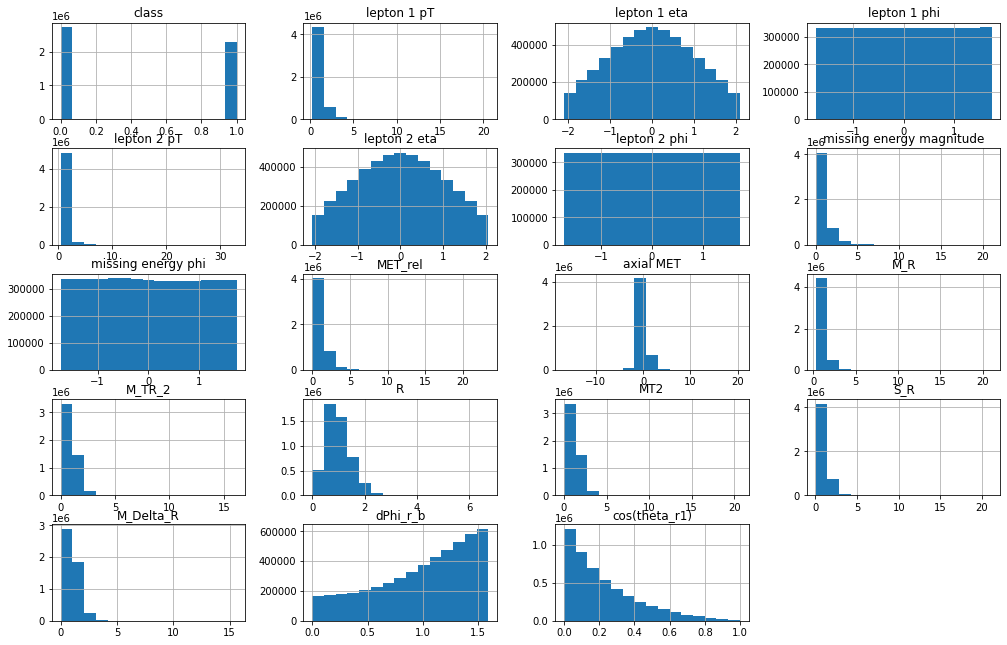

In [8]:
susy_data.hist(figsize=(17,11),bins=15) 

Podemos notar que la variable objetivo $Class$ se distribuye solo en $1$ para procesos SUSY (procesos que producen partículas supersimétricas) y $0$ para procesos que no son SUSY.

Las clases $Lepton$ $1$ $eta$ y $Lepton$ $2$ $eta$ se distribuyen normalmente alrededor de cero.

Las clases $Lepton$ $1$ $phi$, $Lepton$ $2$ $phi$ y $missing$ $energy$ $phi$ se distribuyen uniformemente.

 



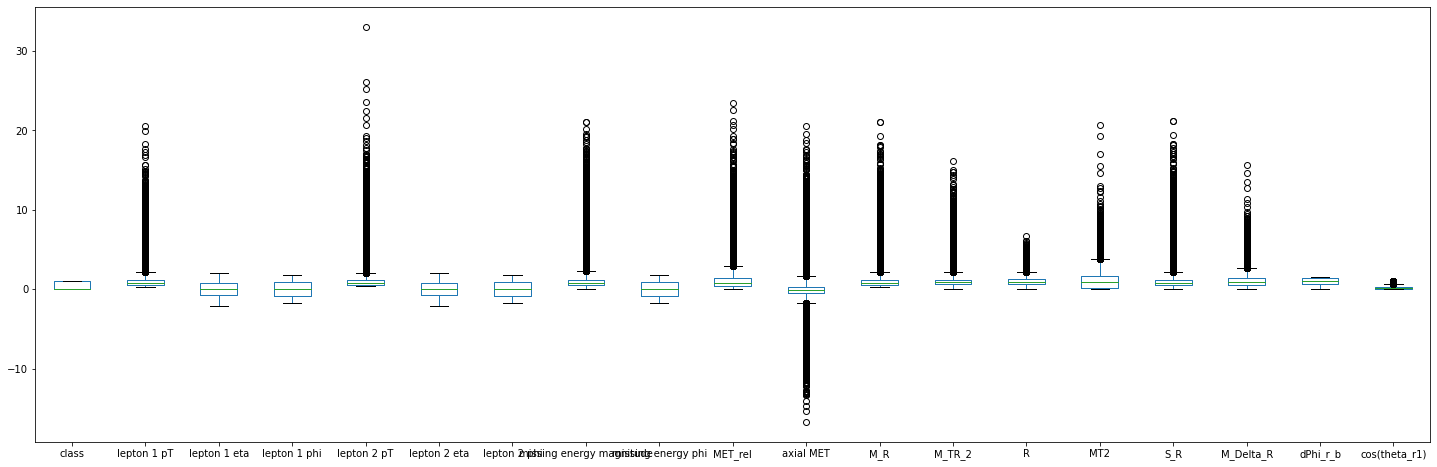

In [9]:
susy_data.plot(kind='box', figsize=(25,8))

Por medio del diagrama de cajas podemos visualizar la presencia de outliers, pero esto se tratará usando Normalización Z-score 

### Normalización Z-score

In [10]:
susy_data

,class,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


In [11]:
std_dev = 3
susy_carac=susy_data.drop(columns=['class'])
new_susy_data=stats.zscore(susy_carac)
outliers = (np.abs(new_susy_data) < std_dev).any(axis=1)
susy_data_limpio=susy_data[outliers]
print("Dimensión del Dataset luego de aplicar regla de las 3 dimensiones estándar ",susy_data_limpio.shape)
new_susy_data=pd.DataFrame(new_susy_data, index=susy_carac.index, columns=susy_carac.columns)
new_susy_data

Dimensión del Dataset luego de aplicar regla de las 3 dimensiones estándar  (5000000, 19)


,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,-0.039946,0.651807,1.174314,0.241090,-1.734911,-0.872866,-0.495149,-0.174746,-0.214990,-0.252102,1.465429,-0.188865,-1.251261,0.168984,1.502329,-0.009183,0.844611,-0.935115
1,0.971370,0.063970,-1.223079,-0.754071,-0.337943,1.669839,2.835978,-1.217158,-1.110447,3.769217,0.072541,-0.739418,-1.100134,-1.164298,-0.888814,-1.274252,0.739308,0.775052
2,-0.808163,-0.133904,-0.708738,-0.837198,-1.609266,-0.767390,0.251973,0.503158,0.932197,-0.430650,-0.753885,-0.100052,1.248020,1.191606,-0.638962,0.901269,0.311788,-0.223392
3,-0.900671,-0.973144,0.692047,-0.841417,0.889266,-0.676206,1.183527,1.530473,2.297123,-1.003637,-0.685343,0.026117,1.236725,0.641831,-0.384873,1.146697,1.129964,-0.681260
4,0.450551,-0.687974,-0.675082,0.901611,-0.691326,0.621912,0.100342,-0.381147,-0.463096,1.363355,0.284546,-0.054335,-0.576317,-1.164298,0.133790,-1.533846,0.356272,-0.660245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,-0.213860,-0.958825,-1.484748,-0.491028,0.492220,1.645305,0.966783,0.276461,0.026588,-1.484121,-0.170918,1.171814,1.431839,2.753424,0.075067,2.639538,0.893707,0.709132
4999996,-0.070907,0.138917,1.434539,-0.181881,-0.350915,-0.739626,-0.812375,-0.731186,-1.123472,0.257376,-0.314051,-0.778335,-0.843568,-1.160809,-0.404618,-0.960337,-1.274984,0.076348
4999997,-0.232680,1.414744,-1.216685,0.299900,1.690882,0.662695,-0.583221,-0.508381,-0.333812,0.045720,-0.278837,-0.473239,-0.470819,-0.288019,-0.259634,-0.619052,0.484090,-1.006303
4999998,1.140494,-0.831005,-0.559108,-0.070447,-0.686982,-1.425888,1.902569,-0.859957,1.253085,2.901576,0.368890,-0.081340,-0.667042,-1.164298,-0.351591,-0.519728,0.454767,-0.666181


Como la dimensión del dataset es la misma que al inicio luego de aplicar la regla de las tres desviaciones estándar, entonces concluimos que no hay outliers.

### Porcentaje de observaciones por clase. 

Un modelo de clasificación que sea útil debe de ser capaz de predecir correctamente un porcentaje de observaciones por encima del porcentaje de la clase mayoritaria.

In [13]:
print("Número de observaciones por clase")
print(susy_data['class'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * susy_data['class'].value_counts(normalize=True))

Número de observaciones por clase
0.0    2712173
1.0    2287827
Name: class, dtype: int64

Porcentaje de observaciones por clase
0.0    54.24346
1.0    45.75654
Name: class, dtype: float64


El $54.2$% de los datos no son procesos que producen SUSY y el $45.8$% sí lo son. En este caso, el umbral de referencia que tiene que superar el modelo de clasificación es del $54.2$%.

Debido a la gran cantidad de datos tomaremos una muestra aleatoria del 10% de los datos conservando la distribución de clases 0.0 $\rightarrow$ 54% y 1.0    $\rightarrow$ 45% aproximadamente. Con esta nueva muestra de datos entrenaremos los modelos para seleccionar los mejores.

In [12]:
susy=susy_data.sample(frac=0.1)
print("LA dimensión de la muestra es: ", susy.shape)
print("")
print("Número de observaciones por clase")
print(susy['class'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * susy['class'].value_counts(normalize=True))

LA dimensión de la muestra es:  (500000, 19)

Número de observaciones por clase
0.0    271461
1.0    228539
Name: class, dtype: int64

Porcentaje de observaciones por clase
0.0    54.2922
1.0    45.7078
Name: class, dtype: float64


# Modelos 

#### Sin Hyperparameter tunning, usando los modelos de Sklearn por default, usando un Standard Scale que resta la media de cada característica y luego escala a la varianza de la unidad y haciendo uso de la muestra aleatoria seleccionada anteriormente.


La estandarización de conjuntos de datos es un requisito común para muchos estimadores de aprendizaje automático implementados en scikit-learn, pues estos podrían comportarse mal si las características individuales no se parecen más o menos a datos distribuidos normalmente.

Usaremos las siguientes métricas para evaluar los diferentes modelos de clasificación.

*   **Precision** nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?

*   **Recall** nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?

*   **F1** combina Precision y Recall en una sola medida

*   **La Matriz de Confusión** indica qué tipos de errores se cometen


## División del Dataset en Train y Test para las características de **bajo nivel**.

Las primeras ocho columnas corresponden a propiedades cinemáticas de las colisiones medidas por los detectores en el acelerador. Estas son llamadas características de bajo nivel.

In [8]:
#DATOS BAJO NIVEL

bajo_nivel=susy.columns[1:9]

# División de los datos en train y test
# ==============================================================================
X_bajo_nivel = susy[bajo_nivel]
y_bajo_nivel = susy['class']

X_train_bajo_nivel, X_test_bajo_nivel, y_train_bajo_nivel, y_test_bajo_nivel = train_test_split(X_bajo_nivel,y_bajo_nivel,test_size=0.3,
                                                  random_state=43,shuffle=True)


### Regresión Logística

              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80     81144
         1.0       0.81      0.65      0.72     68856

    accuracy                           0.77    150000
   macro avg       0.78      0.76      0.76    150000
weighted avg       0.77      0.77      0.76    150000




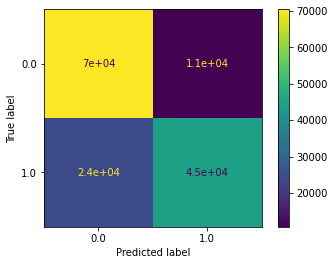

In [9]:
#DATOS BAJO NIVEL

#tubería
#==============================================================================
steps = [('scaler', StandardScaler()), ('logistic_regression', LogisticRegression())]

#Modelo
#==============================================================================
logistic_regression_bajo_nivel = Pipeline(steps)

#Entrenamiento del modelo
# ==============================================================================
logistic_regression_bajo_nivel.fit(X_train_bajo_nivel,y_train_bajo_nivel)

# Predicciones test
# ==============================================================================
predicciones_LR = logistic_regression_bajo_nivel.predict(X_test_bajo_nivel)
predicciones_LR = predicciones_LR.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_bajo_nivel, predicciones_LR))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(logistic_regression_bajo_nivel,X_test_bajo_nivel,y_test_bajo_nivel)

# AUC score 
AUC_LR=roc_auc_score(y_test_bajo_nivel, predicciones_LR)
X_test_bajo_nivel_d=X_test_bajo_nivel
y_test_bajo_nivel_d=y_test_bajo_nivel


**Regrsión Logística para predictores bajo nivel** $Accuracy=$ $0.77$
 

### Árbol de Decisión

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72     81144
         1.0       0.67      0.67      0.67     68856

    accuracy                           0.70    150000
   macro avg       0.70      0.70      0.70    150000
weighted avg       0.70      0.70      0.70    150000




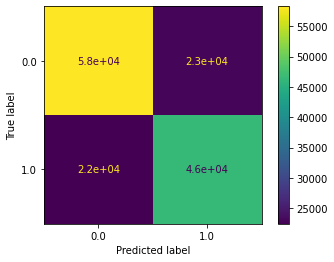

In [10]:
#DATOS BAJO NIVEL

#tubería
#==============================================================================
steps = [('scaler', StandardScaler()), ('tree_classifier', DecisionTreeClassifier())]

#Modelo
#==============================================================================
tree_classifier_bajo_nivel = Pipeline(steps)

#Entrenamiento del modelo
# ==============================================================================
tree_classifier_bajo_nivel.fit(X_train_bajo_nivel,y_train_bajo_nivel)

# Predicciones test
# ==============================================================================
predicciones = tree_classifier_bajo_nivel.predict(X_test_bajo_nivel)
predicciones = predicciones.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_bajo_nivel, predicciones))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(tree_classifier_bajo_nivel,X_test_bajo_nivel,y_test_bajo_nivel)


**Árbol de Decisión para predictores bajo nivel** $Accuracy=0.70$

### Support Vector Machines, SVC

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80     81144
         1.0       0.82      0.63      0.71     68856

    accuracy                           0.77    150000
   macro avg       0.78      0.76      0.76    150000
weighted avg       0.78      0.77      0.76    150000




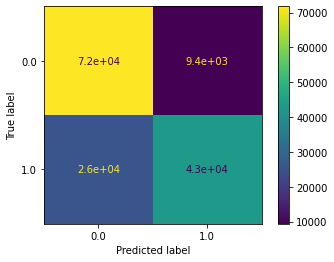

In [11]:
#DATOS BAJO NIVEL

#tubería
#==============================================================================
steps = [('scaler', StandardScaler()), ('SVC', LinearSVC())]

#Modelo
#==============================================================================
SVC_bajo_nivel = Pipeline(steps)

#Entrenamiento del modelo
# ==============================================================================
SVC_bajo_nivel.fit(X_train_bajo_nivel,y_train_bajo_nivel)

# Predicciones test
# ==============================================================================
predicciones = SVC_bajo_nivel.predict(X_test_bajo_nivel)
predicciones = predicciones.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_bajo_nivel, predicciones))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(SVC_bajo_nivel,X_test_bajo_nivel,y_test_bajo_nivel)


**Linear SVC para predictores bajo nivel** $Accuracy=$ $0.77$

## División del Dataset en Train y Test para las características de **alto nivel**.

Las demás diez columnas corresponden a características de alto nivel que son derivadas por los científicos para ayudar a la discriminación de las dos clases.

In [12]:
#DATOS ALTO NIVEL

alto_nivel=susy.columns[9:19]

# División de los datos en train y test
# ==============================================================================
X_alto_nivel = susy[alto_nivel]
y_alto_nivel = susy['class']

X_train_alto_nivel, X_test_alto_nivel, y_train_alto_nivel, y_test_alto_nivel = train_test_split(X_alto_nivel,y_alto_nivel,test_size=0.3,
                                                  random_state=43,shuffle=True)

### Regrsión Logística

              precision    recall  f1-score   support

         0.0       0.75      0.87      0.80     81144
         1.0       0.81      0.65      0.72     68856

    accuracy                           0.77    150000
   macro avg       0.78      0.76      0.76    150000
weighted avg       0.78      0.77      0.77    150000




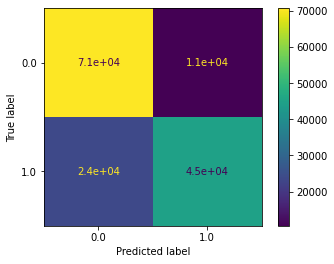

In [13]:
#DATOS ALTO NIVEL

#tubería
#==============================================================================
steps = [('scaler', StandardScaler()), ('logistic_regression', LogisticRegression())]

#Modelo
#==============================================================================
logistic_regression_alto_nivel = Pipeline(steps)

#Entrenamiento del modelo
# ==============================================================================
logistic_regression_alto_nivel.fit(X_train_alto_nivel,y_train_alto_nivel)

# Predicciones test
# ==============================================================================
predicciones = logistic_regression_alto_nivel.predict(X_test_alto_nivel)
predicciones = predicciones.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_alto_nivel, predicciones))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(logistic_regression_alto_nivel,X_test_alto_nivel,y_test_alto_nivel)


**Regresión Logística para predictores alto nivel** $Accuracy=$ $0.77$

### Árbol de Decisión

              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73     81144
         1.0       0.68      0.68      0.68     68856

    accuracy                           0.70    150000
   macro avg       0.70      0.70      0.70    150000
weighted avg       0.71      0.70      0.70    150000




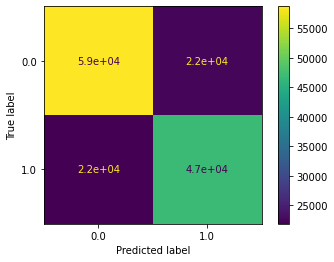

In [14]:
#DATOS ALTO NIVEL

#tubería
#==============================================================================
steps = [('scaler', StandardScaler()), ('tree_classifier', DecisionTreeClassifier())]

#Modelo
#==============================================================================
tree_classifier_alto_nivel = Pipeline(steps)

#Entrenamiento del modelo
# ==============================================================================
tree_classifier_alto_nivel.fit(X_train_alto_nivel,y_train_alto_nivel)

# Predicciones test
# ==============================================================================
predicciones_AD = tree_classifier_alto_nivel.predict(X_test_alto_nivel)
predicciones_AD = predicciones_AD.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_alto_nivel, predicciones_AD))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(tree_classifier_alto_nivel,X_test_alto_nivel,y_test_alto_nivel)

# AUC score 
AUC_AD=roc_auc_score(y_test_alto_nivel, predicciones_AD)
X_test_alto_nivel_d=X_test_alto_nivel
y_test_alto_nivel_d=y_test_alto_nivel

**Árbol de Decisión para predictores alto nivel** $Accuracy=$ $0.70$

### Support Vector Machines, SVC

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

         0.0       0.74      0.88      0.81     81144
         1.0       0.82      0.63      0.72     68856

    accuracy                           0.77    150000
   macro avg       0.78      0.76      0.76    150000
weighted avg       0.78      0.77      0.76    150000




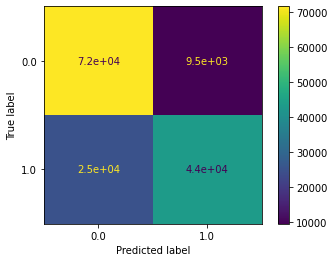

In [15]:
#DATOS ALTO NIVEL

#tubería
#==============================================================================
steps = [('scaler', StandardScaler()), ('SVC', LinearSVC())]

#Modelo
#==============================================================================
SVC_alto_nivel = Pipeline(steps)

#Entrenamiento del modelo
# ==============================================================================
SVC_alto_nivel.fit(X_train_alto_nivel,y_train_alto_nivel)

# Predicciones test
# ==============================================================================
predicciones = SVC_alto_nivel.predict(X_test_alto_nivel)
predicciones = predicciones.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_alto_nivel, predicciones))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(SVC_alto_nivel,X_test_alto_nivel,y_test_alto_nivel)


**SVC para predictores alto nivel** $Accuracy=$ $0.77$

## División del Dataset en Train y Test para las características de **todo nivel**.

In [16]:
#DATOS TODO NIVEL

# División de los datos en train y test
# ==============================================================================
X_todo_nivel = susy.drop(columns=['class'])
y_todo_nivel = susy['class']

X_train_todo_nivel, X_test_todo_nivel, y_train_todo_nivel, y_test_todo_nivel = train_test_split(X_todo_nivel,y_todo_nivel,test_size=0.3,
                                                  random_state=43,shuffle=True) 

### Regresión Logística

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82     81144
         1.0       0.83      0.68      0.75     68856

    accuracy                           0.79    150000
   macro avg       0.80      0.78      0.78    150000
weighted avg       0.79      0.79      0.79    150000




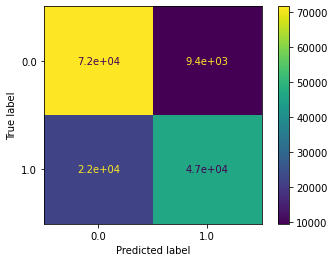

In [17]:
#DATOS TODO NIVEL

#tubería
#==============================================================================
steps = [('scaler', StandardScaler()), ('logistic_regression', LogisticRegression())]

#Modelo
#==============================================================================
logistic_regression_todo_nivel = Pipeline(steps)

#Entrenamiento del modelo
# ==============================================================================
logistic_regression_todo_nivel.fit(X_train_todo_nivel,y_train_todo_nivel)

# Predicciones test
# ==============================================================================
predicciones = logistic_regression_todo_nivel.predict(X_test_todo_nivel)
predicciones = predicciones.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_todo_nivel, predicciones))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(logistic_regression_todo_nivel,X_test_todo_nivel,y_test_todo_nivel)


**Regresión Logística para predictores todo nivel** $Accuracy=$ $0.79$

### Árbol de Decisión

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74     81144
         1.0       0.69      0.69      0.69     68856

    accuracy                           0.71    150000
   macro avg       0.71      0.71      0.71    150000
weighted avg       0.71      0.71      0.71    150000




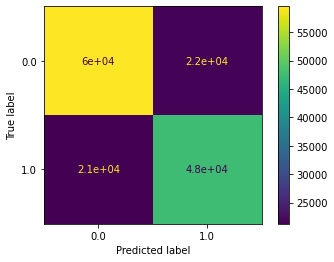

In [18]:
#DATOS TODO NIVEL

#tubería
#==============================================================================
steps = [('scaler', StandardScaler()), ('tree_classifier', DecisionTreeClassifier())]

#Modelo
#==============================================================================
tree_classifier_todo_nivel = Pipeline(steps)

#Entrenamiento del modelo
# ==============================================================================
tree_classifier_todo_nivel.fit(X_train_todo_nivel,y_train_todo_nivel)

# Predicciones test
# ==============================================================================
predicciones = tree_classifier_todo_nivel.predict(X_test_todo_nivel)
predicciones = predicciones.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_todo_nivel, predicciones))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(tree_classifier_todo_nivel,X_test_todo_nivel,y_test_todo_nivel)


**Árbol de Decisión para predictores todo nivel** $Accuracy=$ $0.71$

### Support Vector Machines, SVC

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82     81144
         1.0       0.84      0.66      0.74     68856

    accuracy                           0.79    150000
   macro avg       0.80      0.78      0.78    150000
weighted avg       0.80      0.79      0.78    150000




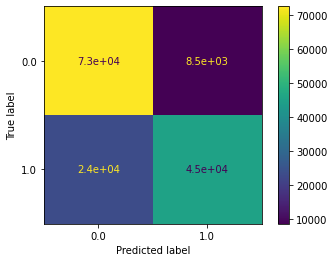

In [20]:
#DATOS TODO NIVEL

#tubería
#==============================================================================
steps = [('scaler', StandardScaler()), ('SVC', LinearSVC())]

#Modelo
#==============================================================================
SVC_todo_nivel = Pipeline(steps)

#Entrenamiento del modelo
# ==============================================================================
SVC_todo_nivel.fit(X_train_todo_nivel,y_train_todo_nivel)

# Predicciones test
# ==============================================================================
predicciones_SVC = SVC_todo_nivel.predict(X_test_todo_nivel)
predicciones_SVC = predicciones_SVC.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_todo_nivel, predicciones_SVC))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(SVC_todo_nivel,X_test_todo_nivel,y_test_todo_nivel)

# AUC score 
AUC_SVC=roc_auc_score(y_test_alto_nivel, predicciones_SVC)
X_test_todo_nivel_d=X_test_todo_nivel
y_test_todo_nivel_d=y_test_todo_nivel

**SVC para predictores todo nivel** $Accuracy=$ $0.79$

Tomando la métrica $Accuracy$ como referencia para comparar los 9 modelos, concluimos que el mejor comportamiento de los modelos de Regresión Logística, Árbol de Decisión y SVC sucede cuando se utilizan todas las características de los niveles bajo y alto.

**Curva ROC:** es una métrica para clasificadores binarios que mide el false positive rate (cantidad de falsos positivos) y el True positive rate (cantidad de verdaderos positivos.

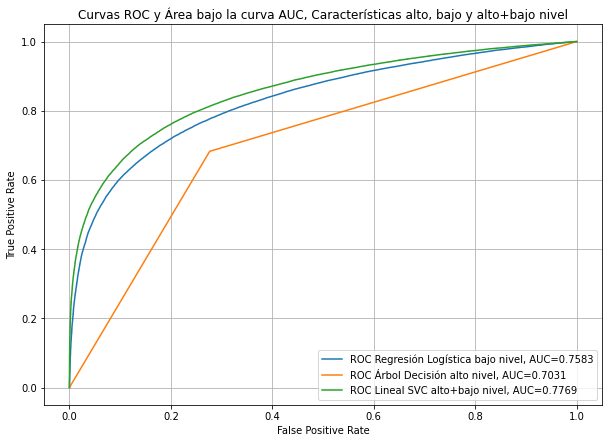

In [23]:
fig, ax = plt.subplots(figsize=(10,7))
plot_roc_curve(logistic_regression_bajo_nivel,X_test_bajo_nivel_d,y_test_bajo_nivel_d, ax=ax,label='ROC Regresión Logística bajo nivel, AUC={:.4}'.format(AUC_LR))
plot_roc_curve(tree_classifier_alto_nivel,X_test_alto_nivel_d,y_test_alto_nivel_d, ax=ax, label='ROC Árbol Decisión alto nivel, AUC={:.4}'.format(AUC_AD))
plot_roc_curve(SVC_todo_nivel,X_test_todo_nivel_d,y_test_todo_nivel_d, ax=ax, label='ROC Lineal SVC alto+bajo nivel, AUC={:.4}'.format(AUC_SVC))

plt.title('Curvas ROC y Área bajo la curva AUC, Características alto, bajo y alto+bajo nivel')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.legend(loc="lower right")



El mejor clasificador es el que tenga mayor area bajo la curva ROC (Característica Operativa del Receptor), es decir, el clasificador que tenga mayor AUC (Área bajo la curva).



Esta gráfica contiene las curvas ROC para cada nivel de características y su respectivo área bajo la curva AUC, para características de nivel bajo se eligió la Regresión Logística, para características de nivel alto se eligió el Árbol de Decisión y para las características de nivel bajo+alto se eligió el LinearSVC.  

La elección de estos modelos fue para mostrar la comparación con la **Figura 7 a)** del artículo [*Searching for exotic particles in high-energy physics with deep learning*]. Las gráficas siguen la misma forma pero orientadas de manera distinta, debido a que nosotros estamos graficando la Característica Operativa del Receptor, la cual es una representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario según se varía el umbral de discriminación. 

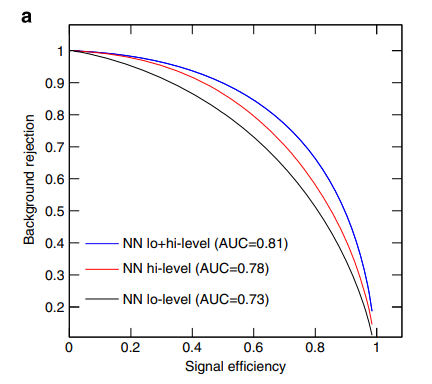

Teniendo en cuenta los AUC de nuestras curvas ROC obtenidas el mejor clasificador es el que usa las características de nivel bajo+alto, **Lineal SVC** con $AUC~0.78$. El mejor clasificador de la Figura 7 a) también es el que usa las características de nivel bajo+alto con $AUC~~0.81$. Por lo tanto nuestros resultados difieren respecto al AUC de aproximadamente el 3%. Esto indica que la clasificación realizada produce buenos resultados.

# A continuación implementaremos el Hyperparameter Tuning

### Regresión logística hyperparameter tunning todo nivel

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82     81504
         1.0       0.83      0.67      0.74     68496

    accuracy                           0.79    150000
   macro avg       0.80      0.78      0.78    150000
weighted avg       0.79      0.79      0.79    150000




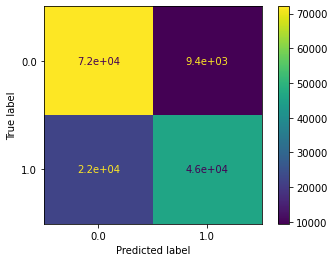

In [14]:
#DATOS TODO NIVEL

# División de los datos en train y test
# ==============================================================================
X_todo_nivel = susy.drop(columns=['class'])
y_todo_nivel = susy['class']

X_train_todo_nivel, X_test_todo_nivel, y_train_todo_nivel, y_test_todo_nivel = train_test_split(X_todo_nivel,y_todo_nivel,test_size=0.3,
                                                  random_state=43,shuffle=True) 

#DATOS TODO NIVEL

#tubería
steps = [('scaler', StandardScaler()), ('logistic_regression_todo_nivel', LogisticRegression())]
pipeline = Pipeline(steps)

#Hyperparametros
#==============================================================================

parameters = {'logistic_regression_todo_nivel__C':np.logspace(-5, 4, 10), 'logistic_regression_todo_nivel__penalty':["l2","l1",'elasticnet']
               , 'logistic_regression_todo_nivel__solver':[ 'saga']}

#Modelo
#==============================================================================
logistic_regression_todo_nivel_GS = GridSearchCV(pipeline, param_grid=parameters, cv=5,n_jobs=-1,scoring = "accuracy")

#Entrenamiento del modelo
# ==============================================================================
logistic_regression_todo_nivel_GS.fit(X_train_todo_nivel,y_train_todo_nivel)

# Predicciones test
# ==============================================================================
predicciones = logistic_regression_todo_nivel_GS.predict(X_test_todo_nivel)
predicciones = predicciones.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_todo_nivel, predicciones))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(logistic_regression_todo_nivel_GS,X_test_todo_nivel,y_test_todo_nivel)

**Regresión Logística para predictores todo nivel con hyperparameter tuning** $Accuracy=$ $0.79$

## Modelo Final Regresión Logística, características Todo nivel y todos los datos.

Usé muchas variaciones a los parámetros de la Regresión Logística, cambiando parámetros como $Solver$, que es elgoritmo a usar en el proceso de optimización; para este parámetro probé con todos los optimizadores *['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']*, pero para conjuntos de datos pequeños, 'liblinear' es una buena opción, mientras que 'sag' y 'saga' son más rápidos para los grandes; es por esta razón que al final decidí usar $Saga$, pues además este optimizador permite las penalizaciones                 *['elasticnet', 'l1', 'l2', 'none']* perimitiendo abarcar un conjunto de hyperparámatros más grande. También se usó el hyperparámetro $C$ que es la Inversa de la fuerza de regularización, es decir mientras más grande el número flotante $C$ menor es la regularización y mientras más cercano a cero, mayor es la regularización.

Se esperaba que al utilizar Hyperparameter tunning obtuvieramos una mejoría en la métrica $Accuracy$, pues al crear un modelo más "personalizado" generalmente se obtienen mejores puntajes. Pero en este caso no hubo mejora alguna, pues el $Accuracy$ dió exactamente igual. Por lo que concluimos que en este caso usando la regresión Logística es mucho mejor elegir los parámetros por defecto que trae Sklearn, pues es menos costoso computacionalmente y produce los mismos resultados respecto al Accuracy que el modelo personalizado. 

Es por esta razón que entrenamos y evaluamos el dataset completo con La Regresión Logística por defecto de Sklearn.

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82    813042
         1.0       0.83      0.68      0.75    686958

    accuracy                           0.79   1500000
   macro avg       0.80      0.78      0.78   1500000
weighted avg       0.79      0.79      0.79   1500000




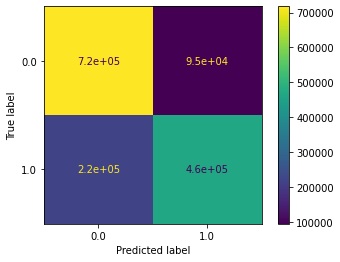

In [15]:
#DATOS TODO NIVEL

# División de los datos en train y test
# ==============================================================================
X_todo_nivel = susy_data.drop(columns=['class'])
y_todo_nivel = susy_data['class']

X_train_todo_nivel, X_test_todo_nivel, y_train_todo_nivel, y_test_todo_nivel = train_test_split(X_todo_nivel,y_todo_nivel,test_size=0.3,
                                                  random_state=43,shuffle=True) 

#DATOS TODO NIVEL

#tubería
#==============================================================================
steps = [('scaler', StandardScaler()), ('logistic_regression', LogisticRegression())]

#Modelo
#==============================================================================
logistic_regression_todo_nivel_Final = Pipeline(steps)

#Entrenamiento del modelo
# ==============================================================================
logistic_regression_todo_nivel_Final.fit(X_train_todo_nivel,y_train_todo_nivel)

# Predicciones test
# ==============================================================================
predicciones_logistic_regression = logistic_regression_todo_nivel_Final.predict(X_test_todo_nivel)
predicciones_logistic_regression = predicciones_logistic_regression.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_todo_nivel, predicciones_logistic_regression))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(logistic_regression_todo_nivel_Final,X_test_todo_nivel,y_test_todo_nivel)

# Curva ROC
# ==============================================================================
AUC_logistic_regression_todo_nivel_Final=roc_auc_score(y_test_todo_nivel, predicciones_logistic_regression)

Obteniendo un $Accuracy=0.79$ en un tiempo de 1 minuto aproxidamente, este tiempo se alcanzó a reducir considerablemente por la implementación de la estandarización de los datos; El mejor clasificador de Regresión Logística es el por defecto de Sklearn, pues el tiempo de cómputo es absolutamente óptimo teniendo en cuenta que se usaron los 5 millones de datos.

## Modelo Final Árbol de Desición, características Todo nivel y todos los datos.

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82    813042
         1.0       0.81      0.71      0.76    686958

    accuracy                           0.79   1500000
   macro avg       0.80      0.79      0.79   1500000
weighted avg       0.79      0.79      0.79   1500000



Best Criterion: entropy
Best max_depth: 15


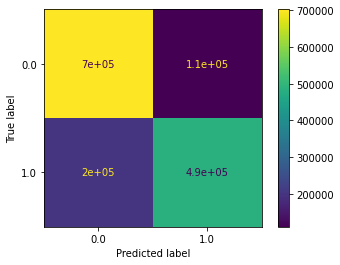

In [7]:
#DATOS TODO NIVEL

#tubería
steps = [('scaler', StandardScaler()), ('tree_classifier_todo_nivel', DecisionTreeClassifier())]
pipeline = Pipeline(steps)

#Hyperparametros
#==============================================================================
parameters = {
    'tree_classifier_todo_nivel__max_depth': [3, 5, 9, 15, 23],
    'tree_classifier_todo_nivel__criterion': ["gini", "entropy"]}

#Modelo
#==============================================================================
tree_classifier_todo_nivel_GS = GridSearchCV(pipeline, param_grid=parameters, cv=5,n_jobs=-1,scoring = "accuracy")

#Entrenamiento del modelo
# ==============================================================================
tree_classifier_todo_nivel_GS.fit(X_train_todo_nivel,y_train_todo_nivel)

# Predicciones test
# ==============================================================================
predicciones_tree_classifier = tree_classifier_todo_nivel_GS.predict(X_test_todo_nivel)
predicciones_tree_classifier = predicciones_tree_classifier.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_todo_nivel, predicciones_tree_classifier))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(tree_classifier_todo_nivel_GS,X_test_todo_nivel,y_test_todo_nivel)

print("")
print('Best Criterion:', tree_classifier_todo_nivel_GS.best_estimator_.get_params()['tree_classifier_todo_nivel__criterion'])
print('Best max_depth:', tree_classifier_todo_nivel_GS.best_estimator_.get_params()['tree_classifier_todo_nivel__max_depth'])

AUC_tree_classifier_todo_nivel_GS=roc_auc_score(y_test_todo_nivel, predicciones_tree_classifier)

Se logra mejorar el $Accuracy=0.79$ con el hyperparameter tuning, ya que sin él teníamos $Accuracy=0.72$. Los mejores hyperparametros encontrados fueron $Criterion=entropy$ La entropía es una medida de información que indica el desorden de las características con el objetivo. Similar al índice de Gini, la división óptima es elegida por la característica con menos entropía. Obtiene su valor máximo cuando la probabilidad de las dos clases es la misma y un nodo es puro cuando la entropía tiene su valor mínimo, que es 0; y $max$_$depth=15$ que es la profundidad máxima del árbol. El tiempo de entrenamiento fue de 1 hora con 10 minutos, lo cual no es tanto considerando que se usaron todos los 5 millones de datos. Este modelo respecto a otros puestos a prueba, con conjuntos de hiperparámetros más grandes y sin haber escalado los datos, se obtuvieron tiempos hasta de 5 horas produciendo el mismo puntaje de Accuracy. 

## Modelo Final LinearSVC, características Todo nivel y todos los datos

Se demora más de 3 horas en correr el código con todos los datos, adjunto prueba:

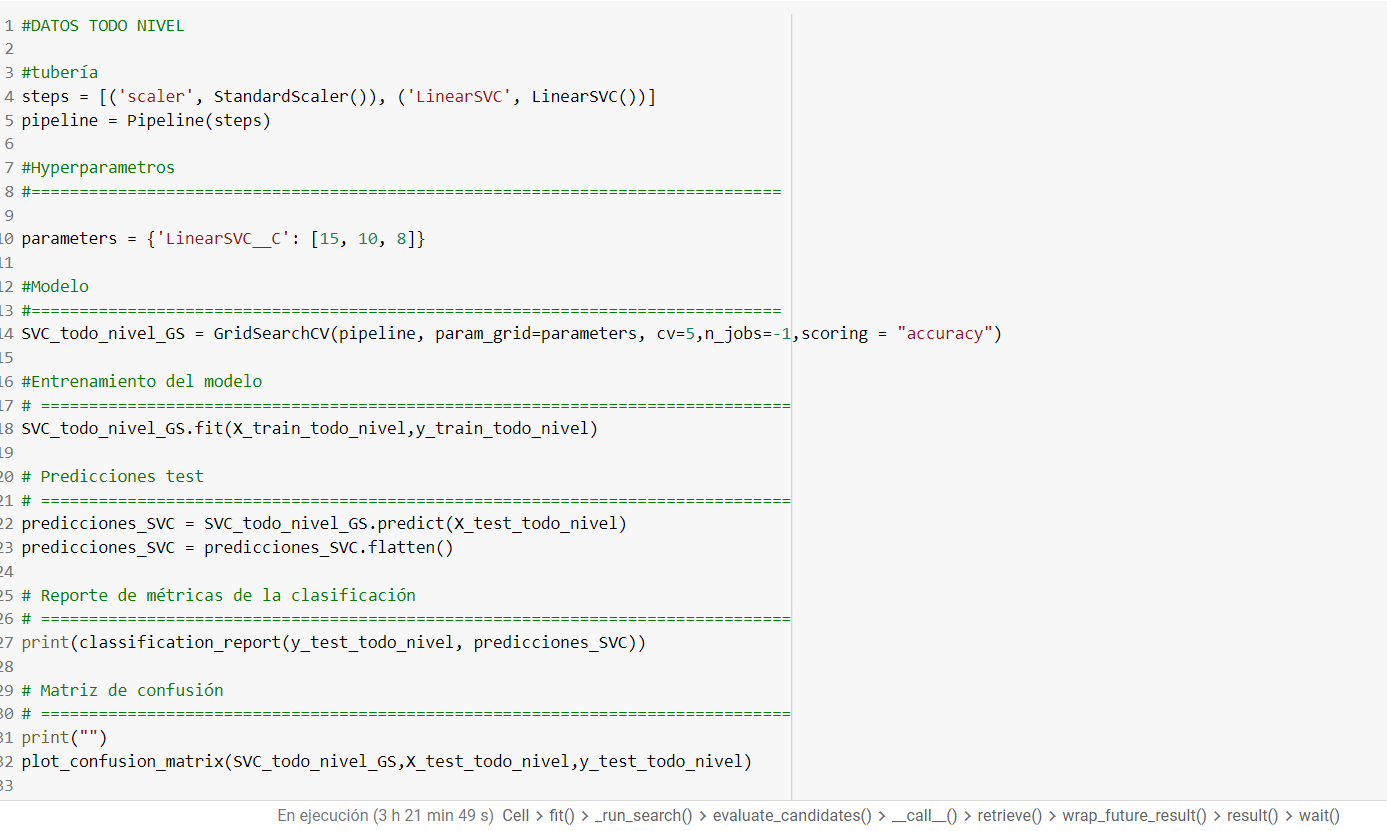

Debido, y además con la muestra aleatoria del 10%, adjunto prueba, se puede notar que aún cuando se varían los hiperparámetros el $Accuracy=0.79$ no mejora respecto al modelo por defecto de LinearSVC de Sklearn.

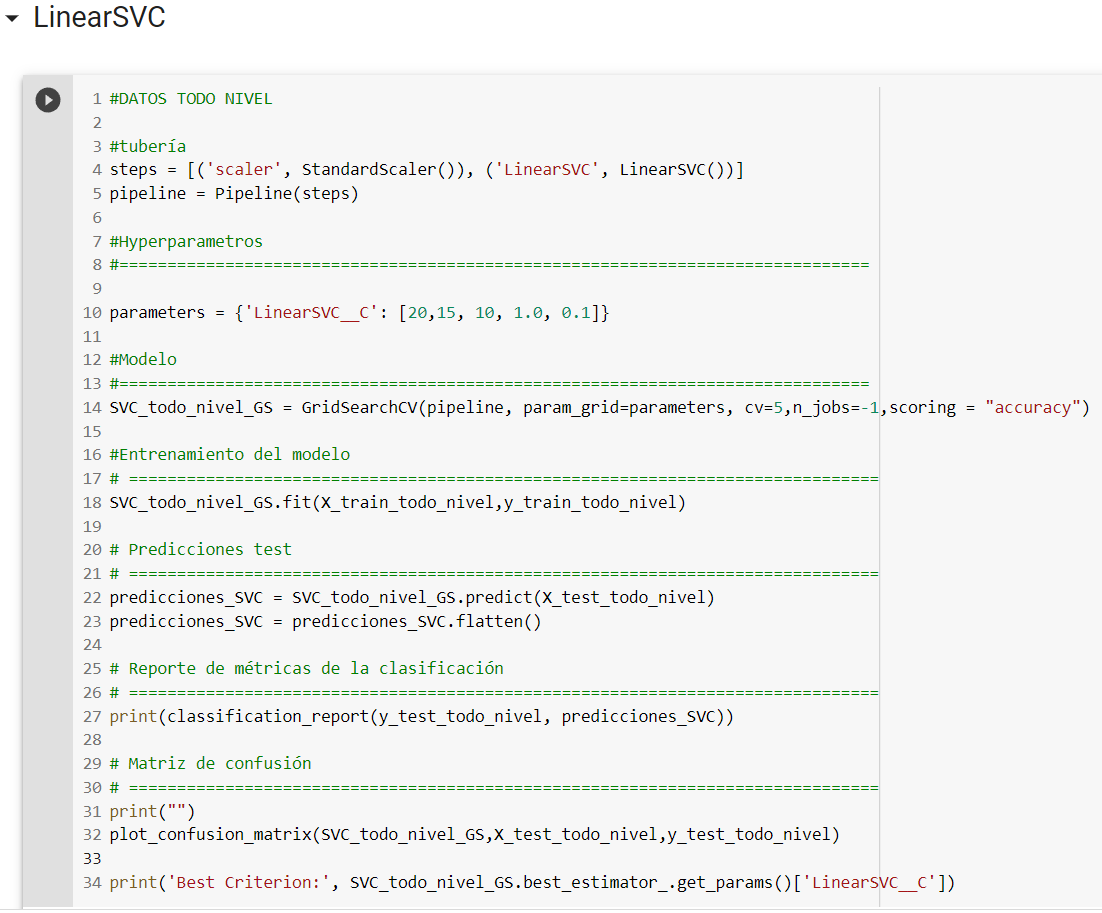

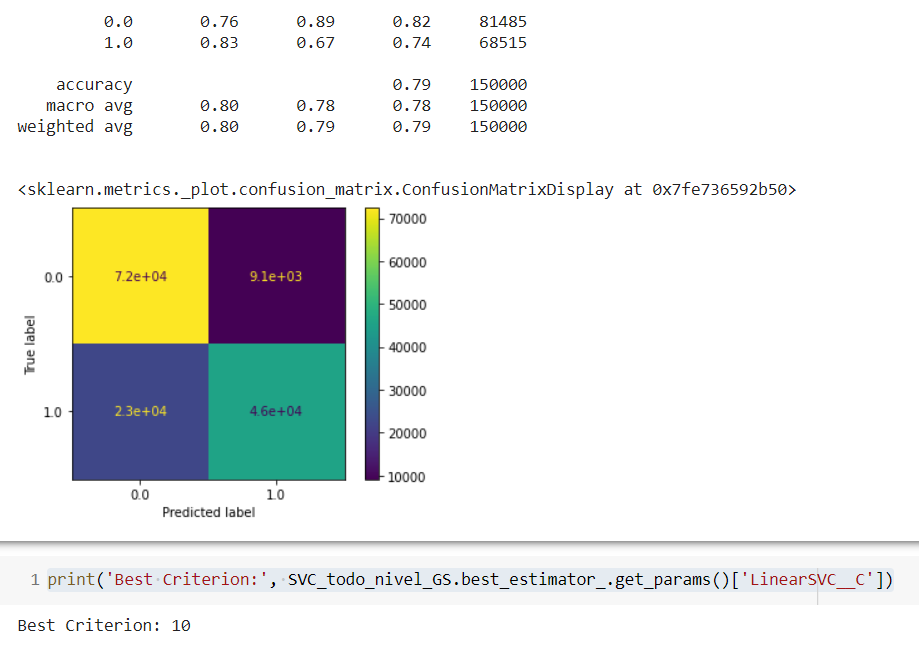

Teniendo lo anterior en cuenta elegimos como hiperparámetro $C=15$ y entrenamos el modelo con todos los datos, sin embargo se demoró mas de dos horas también.

Por lo tanto elegimos, como en el caso de la Regresión Logística, el modelo por defecto de LinearSVC que proporciona Sklearn. pues de esta manera es un poco más eficiente el costo computacional y el tiempo de entrenamiento del clasificador. Obteniendo lo siguiente:

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82    813042
         1.0       0.84      0.66      0.74    686958

    accuracy                           0.79   1500000
   macro avg       0.80      0.78      0.78   1500000
weighted avg       0.80      0.79      0.78   1500000




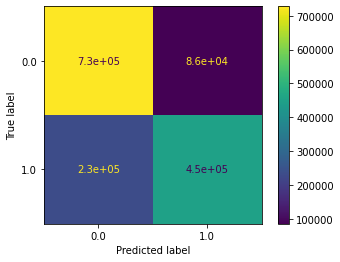

In [16]:
#DATOS TODO NIVEL

#tubería
#==============================================================================
steps = [('scaler', StandardScaler()), ('SVC', LinearSVC())]

#Modelo
#==============================================================================
SVC_todo_nivel_GS = Pipeline(steps)

#Entrenamiento del modelo
# ==============================================================================
SVC_todo_nivel_GS.fit(X_train_todo_nivel,y_train_todo_nivel)

# Predicciones test
# ==============================================================================
predicciones_SVC = SVC_todo_nivel_GS.predict(X_test_todo_nivel)
predicciones_SVC = predicciones_SVC.flatten()

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test_todo_nivel, predicciones_SVC))

# Matriz de confusión
# ==============================================================================
print("")
plot_confusion_matrix(SVC_todo_nivel_GS,X_test_todo_nivel,y_test_todo_nivel)

AUC_SVC_todo_nivel_GS=roc_auc_score(y_test_todo_nivel, predicciones_SVC)

Se consigue $Accuracy=0.79$ en un tiempo de 36min, fue el clasificador más óptimo usando SVC, específicamente LinearSVC.

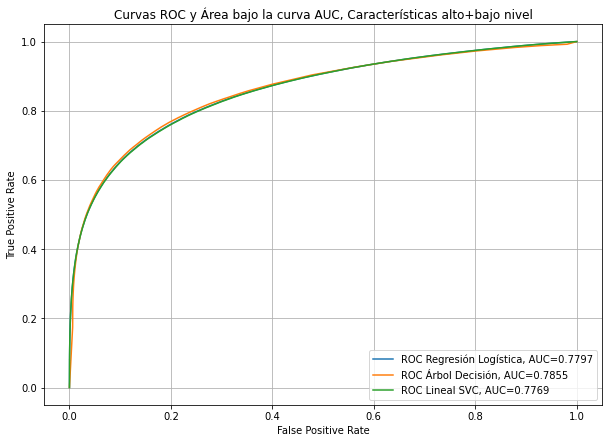

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
plot_roc_curve(logistic_regression_todo_nivel_Final,X_test_todo_nivel,y_test_todo_nivel, ax=ax,label='ROC Regresión Logística, AUC={:.4}'.format(AUC_logistic_regression_todo_nivel_Final))
plot_roc_curve(tree_classifier_todo_nivel_GS,X_test_todo_nivel,y_test_todo_nivel, ax=ax, label='ROC Árbol Decisión, AUC={:.4}'.format(AUC_tree_classifier_todo_nivel_GS))
plot_roc_curve(SVC_todo_nivel_GS,X_test_todo_nivel,y_test_todo_nivel, ax=ax, label='ROC Lineal SVC, AUC={:.4}'.format(AUC_SVC_todo_nivel_GS))

plt.title('Curvas ROC y Área bajo la curva AUC, Características alto+bajo nivel')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.legend(loc="lower right")

Comparando esta gráfica con la **Figura 7 b)** del artículo [*Searching for exotic particles in high-energy physics with deep learning*]. Las gráficas siguen la misma forma pero orientadas de manera distinta, debido a que nosotros estamos graficando la Característica Operativa del Receptor, la cual es una representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario según se varía el umbral de discriminación. Además, en la figura del artículo mencionada graficaron un mismo modelo de clasificación para las características de alto, bajo y alto+bajo nivel, mientras que aquí se graficó solo usando las características de alto+bajo nivel para 3 modelos de clasificación diferentes, Regresión Logística, Árbol de Decisión y Máquina de Soporte Vectorial.

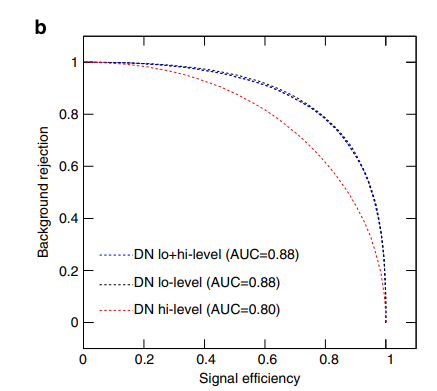

Teniendo en cuenta que en el artículo usaron Deep Learning, y nosotros Machine Learning, obtenemos diferencias de 0.0945 unidades AUC (área bajo la curva), lo cual está bien.  

Finalmente y basándonos en que el mejor clasificador es el que tiene mayor AUC (área bajo la curva), usando todas las características de alto+bajo nivel y los 5 Millones de datos, el mejor clasificador fue El Árbol de Decisión con un $AUC=0.7855$, ganando por una diferencia mínima de alrededor 0.01 unidades de AUC frente a la Regresión Logística y la Máquina de Soporte Vectorial.